# Load Library

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import re
import random
import statistics
import math
from collections import Counter

import scipy.stats as stats
from scipy.stats import f_oneway
from statsmodels.sandbox.stats.multicomp import MultiComparison
from scipy.stats import chi2_contingency
import urllib
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
%matplotlib inline

#pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Load Data

In [3]:
file_path_patient = "Seton COVID Cohort Dataset Share SDH/covid_pts_enc_level_labs_dx_2021-02-02_deid.csv"
file_path_patient_extra = "Seton COVID Cohort Dataset Share SDH/meds_admin_for_SOFA_COVID_cohort_SDH_share.csv"
file_path_zip = 'datasets/zip_code_data.csv'
file_path_census_tract = 'datasets/zcta_tract_rel_10.txt'
file_path_svi = 'datasets/Texas.csv'

# Read csv as a dataframe from the path
df = pd.read_csv(file_path_patient, index_col=False)
df_extra = pd.read_csv(file_path_patient_extra, index_col=False)
df_zip = pd.read_csv(file_path_zip, index_col=False)
df_census_tract = pd.read_csv(file_path_census_tract, index_col=False)
df_svi = pd.read_csv(file_path_svi)

# Exploratory Data Anlaysis (EDA)

## Data: Main

In [4]:
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2469 entries, 0 to 2468
Data columns (total 70 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   admit_dt_tm                    2469 non-null   object 
 1   discharge_dt_tm                2384 non-null   object 
 2   facility                       2469 non-null   object 
 3   encounter_type_display         2469 non-null   object 
 4   age_at_admit                   2469 non-null   int64  
 5   gender                         2469 non-null   object 
 6   zip_cust_table                 2469 non-null   object 
 7   ethnicity_display              2469 non-null   object 
 8   race_display                   2469 non-null   object 
 9   race_eth_comb                  2445 non-null   object 
 10  length_of_stay                 2384 non-null   float64
 11  icd_prim                       2328 non-null   object 
 12  deceased_dt_tm                 216 non-null    o

,admit_dt_tm,discharge_dt_tm,facility,encounter_type_display,age_at_admit,gender,zip_cust_table,ethnicity_display,race_display,race_eth_comb,length_of_stay,icd_prim,deceased_dt_tm,discharge_disposition_display,dc_dispo_cat,insured_uninsured,admit_source,arrival_mode,vent_hours_summed,vent_first_order_start_time,vent_last_order_end_time,icu_hours_summed,icu_first_begin_time,icu_last_end_time,occupation,occ_cat,emp_yn,Creatinine,Abs_Lymph,ALT,AST,Bili_Total,D-Dimer,Diastolic_Blood_Pressure,Dosing_Weight_(kg),FiO2/Percent,Glasgow_Coma_Score,Lymph_Auto,Oxygen_Delivery_Method,Oxygen_Saturation,Platelet,pO2_Art,Procalcitonin,Respiratory_Rate,Systolic_Blood_Pressure,Troponin-I,WBC,Oxygen_Flow_Rate,Patient_Smoking_Status,Visit_Reason,Height_(in),Mean_Arterial_Pressure,SARSCOV2,SARSCOV2_Source,heart_pulse_comb,temp_oral_degC,calc_pulled_BMI,no_dx_data,COPD_com_flag,asthma_com_flag,diabetes_com_flag,hypertension_com_flag,CAD_com_flag,heartfailure_com_flag,CKD_com_flag,cancer_com_flag,qSOFA_score,deid_empi_encounter,deid_mrn_encounter,deid_fin_encounter
0,2020-08-25 20:51:00,2020-09-01 14:30:00,Shoal Creek,IP Private/Semi Private room,49,Male,Unknown,Hispanic or Latino,White,White Hispanic,6.75,NaN,NaN,Home,Home,Unknown,Transfer from a Hospital,NaN,NaN,NaN,NaN,36.55,2020-08-25 20:53:00,2020-08-27 09:26:00,NaN,Not yet chart searched,NaN,1.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,NaN,4dMaH,61003,10650
1,2020-03-24 00:07:00,2020-03-26 18:30:00,Medical Center,IP ICU,44,Male,78130,Hispanic or Latino,White,White Hispanic,2.75,A41.9,3/26/2020 14:10,Expired,Expired,Insured,Transfer from a Hospital,NaN,58.45,2020-03-24 05:55:00,2020-03-26 16:22:00,69.48,2020-03-23 21:01:00,2020-03-26 18:30:00,NaN,Not yet chart searched,NaN,2.9,2.0,94,253.0,3.1,>5250,21.0,99.200,50.0,3.0,5.7,Ventilator,96.0,42.0,470.8,24.53,23.0,36.0,0.73,35.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.0,NaN,30.620000,False,False,False,False,False,False,False,False,False,3.0,8wQnr,84969,27818
2,2020-03-25 13:25:00,2020-03-30 03:48:00,Medical Center,IP Private/Semi Private room,80,Female,78758,Not Hispanic or Latino,Black or African American,Other race Non Hispanic,4.58,A41.89,3/30/2020 3:48,Expired,Expired,Insured,Emergency room,Ambulance,NaN,NaN,NaN,NaN,NaN,NaN,Not employed,Not employed,Not employed,1.2,1.8,18,87.0,0.2,NaN,77.0,90.100,NaN,11.0,12.4,Nasal cannula,NaN,556.0,130.1,NaN,20.0,110.0,0.2,14.3,4.0,Unknown if ever smoked,AMS,NaN,NaN,NaN,NaN,125.0,NaN,NaN,False,False,False,True,False,True,True,True,False,1.0,6YGuu,69112,34412
3,2020-03-25 13:36:00,2020-03-27 13:15:00,Medical Center,IP Private/Semi Private room,56,Male,78746,Not Hispanic or Latino,White,White Non Hispanic,2.00,R19.7,NaN,Home,Home,Insured,Emergency room,Private Vehicle,NaN,NaN,NaN,NaN,NaN,NaN,Chef,Restaurant,Employed,0.9,0.9,31,30.0,0.9,<200,89.0,84.368,NaN,15.0,10.6,Room air,92.0,193.0,NaN,0.04,38.0,144.0,NaN,8.2,2.0,Never smoker,diarrhea,70.0,107.3,NaN,NaN,86.0,38.4,26.687783,False,False,False,False,False,False,False,False,False,1.0,P1Tjg,84820,37981
4,2020-03-25 13:43:00,2020-03-27 12:44:00,Medical Center,IP Private/Semi Private room,46,Female,78757,Not Hispanic or Latino,White,White Non Hispanic,1.96,J12.89,NaN,Home,Home,Insured,Emergency room,Private Vehicle,NaN,NaN,NaN,NaN,NaN,NaN,Newspaper,Other,Employed,0.8,1.7,25,37.0,0.7,NaN,78.0,99.500,NaN,15.0,33.2,Room air,95.0,184.0,NaN,0.04,18.0,117.0,NaN,5.1,NaN,Never smoker,poss covid asthma,66.0,91.0,NaN,NaN,82.0,37.3,35.410000,False,False,True,False,False,False,False,False,False,0.0,iouKO,76686,41152


## Data: Extra

In [5]:
print(df_extra.info())
df_extra.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33892 entries, 0 to 33891
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   medication_name       33892 non-null  object 
 1   dose_of_medication    33892 non-null  object 
 2   administration_dt_tm  33892 non-null  object 
 3   SOFA                  0 non-null      float64
 4   deid_fin_encounter    33892 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 1.3+ MB
None


,medication_name,dose_of_medication,administration_dt_tm,SOFA,deid_fin_encounter
0,norepinephrine,0.030122 mg,2020-08-03T09:59:59.000-05:00,NaN,35541
1,norepinephrine,0.11296 mg,2020-08-02T23:59:59.000-05:00,NaN,35541
2,norepinephrine,0.077088 mg,2020-08-02T22:59:59.000-05:00,NaN,35541
3,norepinephrine,mcg/kg/min,2020-08-03T09:15:00.000-05:00,NaN,35541
4,norepinephrine,0.080864 mg,2020-08-03T05:59:59.000-05:00,NaN,35541


## Data: Zip code

In [6]:
print(df_zip.info())
df_zip.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1935 entries, 0 to 1934
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   zip_code             1935 non-null   object
 1   male_poverty_rate    1935 non-null   object
 2   female_poverty_rate  1935 non-null   object
 3   median_income        1935 non-null   object
 4   mean_income          1935 non-null   object
 5   poverty_rate         1935 non-null   object
dtypes: object(6)
memory usage: 90.8+ KB
None


,zip_code,male_poverty_rate,female_poverty_rate,median_income,mean_income,poverty_rate
0,ZCTA5 75001,3.8,11.4,72512,87472,10.9
1,ZCTA5 75002,1.4,5.2,101429,125779,4.9
2,ZCTA5 75006,2.1,12.3,64462,85788,10.8
3,ZCTA5 75007,1.8,6.6,86648,102783,6.7
4,ZCTA5 75009,1.2,6.1,111146,144513,4


## Data: Census tract

In [7]:
# Extract only data from Texas state Travis county
df_census_tract_tx_travis = df_census_tract.loc[(df_census_tract['STATE']==48) & (df_census_tract['COUNTY']==453)].copy()
df_census_tract_tx_travis.reset_index(drop=True, inplace=True)

print(df_census_tract_tx_travis.info())
df_census_tract_tx_travis.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362 entries, 0 to 361
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ZCTA5          362 non-null    int64  
 1   STATE          362 non-null    int64  
 2   COUNTY         362 non-null    int64  
 3   TRACT          362 non-null    int64  
 4   GEOID          362 non-null    int64  
 5   POPPT          362 non-null    int64  
 6   HUPT           362 non-null    int64  
 7   AREAPT         362 non-null    int64  
 8    AREALANDPT    362 non-null    int64  
 9   ZPOP           362 non-null    int64  
 10  ZHU            362 non-null    int64  
 11  ZAREA          362 non-null    int64  
 12  ZAREALAND      362 non-null    int64  
 13  TRPOP          362 non-null    int64  
 14  TRHU           362 non-null    int64  
 15  TRAREA         362 non-null    int64  
 16  TRAREALAND     362 non-null    int64  
 17  ZPOPPCT        362 non-null    float64
 18  ZHUPCT    

,ZCTA5,STATE,COUNTY,TRACT,GEOID,POPPT,HUPT,AREAPT,AREALANDPT,ZPOP,ZHU,ZAREA,ZAREALAND,TRPOP,TRHU,TRAREA,TRAREALAND,ZPOPPCT,ZHUPCT,ZAREAPCT,ZAREALANDPCT,TRPOPPCT,TRHUPCT,TRAREAPCT,TRAREALANDPCT
0,78610,48,453,2428,48453002428,0,0,693212,692557,23502,8184,240195543,239275955,5618,2627,19847369,19842804,0.00,0.00,0.29,0.29,0.00,0.00,3.49,3.49
1,78610,48,453,2432,48453002432,161,59,3929456,3929456,23502,8184,240195543,239275955,2070,669,44442850,44424093,0.69,0.72,1.64,1.64,7.78,8.82,8.84,8.85
2,78610,48,453,2434,48453002434,1570,502,53609086,53609080,23502,8184,240195543,239275955,1718,549,55160988,55160982,6.68,6.13,22.32,22.40,91.39,91.44,97.19,97.19
3,78610,48,453,2436,48453002436,340,123,9184558,9184558,23502,8184,240195543,239275955,2672,871,56205411,56205398,1.45,1.50,3.82,3.84,12.72,14.12,16.34,16.34
4,78612,48,453,2433,48453002433,596,197,5198187,4960490,11457,4274,244502254,243038259,5981,1886,72222670,71008056,5.20,4.61,2.13,2.04,9.96,10.45,7.20,6.99


## Data: Social Vulnerable Index

In [8]:
# Extract only data from Travis county.
df_svi_tx_travis = df_svi.loc[df_svi['COUNTY']=='Travis'].copy()
df_svi_tx_travis.reset_index(drop=True, inplace=True)

print(df_svi_tx_travis.info())
df_svi_tx_travis.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Columns: 124 entries, ST to E_DAYPOP
dtypes: float64(58), int64(62), object(4)
memory usage: 211.3+ KB
None


,ST,STATE,ST_ABBR,STCNTY,COUNTY,FIPS,LOCATION,AREA_SQMI,E_TOTPOP,M_TOTPOP,E_HU,M_HU,E_HH,M_HH,E_POV,M_POV,E_UNEMP,M_UNEMP,E_PCI,M_PCI,E_NOHSDP,M_NOHSDP,E_AGE65,M_AGE65,E_AGE17,M_AGE17,E_DISABL,M_DISABL,E_SNGPNT,M_SNGPNT,E_MINRTY,M_MINRTY,E_LIMENG,M_LIMENG,E_MUNIT,M_MUNIT,E_MOBILE,M_MOBILE,E_CROWD,M_CROWD,E_NOVEH,M_NOVEH,E_GROUPQ,M_GROUPQ,EP_POV,MP_POV,EP_UNEMP,MP_UNEMP,EP_PCI,MP_PCI,EP_NOHSDP,MP_NOHSDP,EP_AGE65,MP_AGE65,EP_AGE17,MP_AGE17,EP_DISABL,MP_DISABL,EP_SNGPNT,MP_SNGPNT,EP_MINRTY,MP_MINRTY,EP_LIMENG,MP_LIMENG,EP_MUNIT,MP_MUNIT,EP_MOBILE,MP_MOBILE,EP_CROWD,MP_CROWD,EP_NOVEH,MP_NOVEH,EP_GROUPQ,MP_GROUPQ,EPL_POV,EPL_UNEMP,EPL_PCI,EPL_NOHSDP,SPL_THEME1,RPL_THEME1,EPL_AGE65,EPL_AGE17,EPL_DISABL,EPL_SNGPNT,SPL_THEME2,RPL_THEME2,EPL_MINRTY,EPL_LIMENG,SPL_THEME3,RPL_THEME3,EPL_MUNIT,EPL_MOBILE,EPL_CROWD,EPL_NOVEH,EPL_GROUPQ,SPL_THEME4,RPL_THEME4,SPL_THEMES,RPL_THEMES,F_POV,F_UNEMP,F_PCI,F_NOHSDP,F_THEME1,F_AGE65,F_AGE17,F_DISABL,F_SNGPNT,F_THEME2,F_MINRTY,F_LIMENG,F_THEME3,F_MUNIT,F_MOBILE,F_CROWD,F_NOVEH,F_GROUPQ,F_THEME4,F_TOTAL,E_UNINSUR,M_UNINSUR,EP_UNINSUR,MP_UNINSUR,E_DAYPOP
0,48,TEXAS,TX,48453,Travis,48453000101,"Census Tract 1.01, Travis County, Texas",1.206569,4652,418,2273,68,2133,107,294,128,79,61,67846,7009,43,42,783,131,855,120,378,113,139,85,802,505,0,52,729,113,11,18,8,18,140,61,17,39,6.4,2.8,2.8,2.2,67846.0,7009.0,1.3,1.2,16.8,3.3,18.4,2.0,8.2,2.5,6.5,4.0,17.2,10.8,0.0,1.2,32.1,4.9,0.5,0.8,0.4,0.9,6.6,2.8,0.4,0.8,0.2030,0.1882,0.0389,0.0333,0.4634,0.0512,0.7517,0.1391,0.2348,0.2980,1.4236,0.1716,0.0735,0.0000,0.0735,0.0208,0.8535,0.3952,0.1008,0.6693,0.6645,2.6833,0.6702,4.6438,0.1653,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,117,74,2.5,1.6,5986
1,48,TEXAS,TX,48453,Travis,48453000102,"Census Tract 1.02, Travis County, Texas",2.125888,2604,170,1193,32,1110,71,45,32,22,22,112935,17709,21,26,704,133,556,75,290,104,18,19,268,248,3,48,17,23,0,13,0,18,8,13,20,9,1.7,1.2,1.7,1.7,112935.0,17709.0,1.1,1.3,27.0,4.9,21.4,2.5,11.1,4.1,1.6,1.7,10.3,9.5,0.1,2.0,1.4,2.0,0.0,3.3,0.0,1.7,0.7,1.2,0.8,0.3,0.0245,0.0724,0.0057,0.0251,0.1277,0.0027,0.9734,0.2477,0.4503,0.0333,1.7047,0.3019,0.0201,0.0386,0.0587,0.0151,0.3347,0.0000,0.0000,0.0915,0.7288,1.1550,0.1105,3.0461,0.0344,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,52,51,2.0,2.0,2850
2,48,TEXAS,TX,48453,Travis,48453000203,"Census Tract 2.03, Travis County, Texas",0.466611,1890,250,957,38,816,59,549,176,28,27,46499,13710,103,77,87,47,133,105,150,124,12,23,768,321,0,52,901,74,0,13,59,41,42,29,300,166,33.0,8.6,2.8,2.8,46499.0,13710.0,8.8,5.8,4.6,2.4,7.0,5.5,9.0,6.7,1.5,2.8,40.6,16.1,0.0,2.8,94.1,6.8,0.0,4.1,7.2,5.0,5.1,3.6,15.9,8.5,0.8907,0.1882,0.1210,0.3064,1.5063,0.3483,0.0593,0.0191,0.2929,0.0304,0.4017,0.0146,0.3393,0.0000,0.3393,0.1429,0.9977,0.0000,0.7452,0.5757,0.9644,3.2830,0.8853,5.5303,0.2602,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,2,2,96,61,5.8,3.4,13054
3,48,TEXAS,TX,48453,Travis,48453000204,"Census Tract 2.04, Travis County, Texas",0.703838,3013,227,1783,39,1576,108,532,178,108,74,62372,9634,81,59,397,78,406,45,179,67,39,37,806,330,10,52,616,128,0,13,35,29,228,85,60,26,18.0,5.3,5.8,4.0,62372.0,9634.0,3.6,2.6,13.2,3.0,13.5,1.1,6.0,2.4,2.5,2.3,26.8,10.8,0.3,1.8,34.5,7.1,0.0,2.2,2.2,1.9,14.5,5.3,2.0,0.8,0.6194,0.5946,0.0494,0.1180,1.3814,0.3063,0.5629,0.0524,0.0984,0.0673,0.7810,0.0352,0.1771,0.0618,0.2389,0.0943,0.8699,0.0000,0.3242,0.9127,0.8300,2.9368,0.7677,5.3381,0.2394,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,200,102,6.7,3.5,12624
4,48,TEXAS,TX,48453,Travis,48453000205,"Census Tract 2.05, Travis County, Texas",0.583848,3942,399,2472,107,2253,168,104,66,34,31,53071,5355,48,45,374,243,280,134,339,249,33,37,1394,499,150,226,1168,254,0,13,24,39,169,116,0,13,2.6,1.7,1.1,1.0,53071.0,5355.0,1.4,1.3,9.5,5.7,7.1,3.3,8.6,5.9,1.5,1.7,35.4,12.1,4.0,6.0,47.2,10.1,0.0,1.6,1.1,1.7,7.5,5.0,0.0,0.3,0.0531,0.0358,0.0818,0.0371,0.2078,0.0088,0.3196,0.0201,0.2632,0.0304,0.6333,0.0259,0.2796,0.4918,0.7714,0.3810,0.9233,0.0000,0.1865,0.7144,0.0000,1.8242,0.3017,3.4367,0.0572,0,0,0,0,0,0,0,0,0,0,

# Functions

## Calculate SOFA scores

In [9]:
# https://www.mdcalc.com/sequential-organ-failure-assessment-sofa-score
# https://www.mdcalc.com/sequential-organ-failure-assessment-sofa-score#evidence
# https://ccforum.biomedcentral.com/articles/10.1186/s13054-019-2663-7

calibration_sofa_mortality = {
    0: 0.0,
    1: 0.0,
    2: 6.4,
    3: 6.4,
    4: 20.2,
    5: 20.2,
    6: 21.5,
    7: 21.5,
    8: 33.3,
    9: 33.3,
    10: 50.0,
    11: 50.0,
    12: 95.2,
    13: 95.2,
    14: 95.2,
    15: 95.2,
    16: 95.2,
    17: 95.2,
    18: 95.2,
    19: 95.2,
    20: 95.2,
    21: 95.2,
    22: 95.2,
    23: 95.2,
    24: 95.2
}

def calculate_sofa(patient):
    score = 0
    
    # 1. Respiratory system: PaO2/FiO2 (mmHg)
    if (patient['pO2_Art']/patient['FiO2/Percent'])*100 >= 300 and (patient['pO2_Art']/patient['FiO2/Percent'])*100 <= 399:
        score += 1 
        
    elif ((patient['pO2_Art']/patient['FiO2/Percent'])*100 >= 200 and (patient['pO2_Art']/patient['FiO2/Percent'])*100 <= 299) or ((patient['pO2_Art']/patient['FiO2/Percent'])*100 <= 199 and patient['vent_hours_summed'] == np.nan):
        score += 2
        
    #elif (patient['pO2_Art']/patient['FiO2/Percent'])*100 >= 100 and (patient['pO2_Art']/patient['FiO2/Percent'])*100 <= 199 and patient['vent_hours_summed'].notnull() == True:
    elif (patient['pO2_Art']/patient['FiO2/Percent'])*100 >= 100 and (patient['pO2_Art']/patient['FiO2/Percent'])*100 <= 199 and patient['vent_hours_summed'] != np.nan:
        score += 3
        
    elif (patient['pO2_Art']/patient['FiO2/Percent'])*100 < 100 and patient['vent_hours_summed'] != np.nan:
        score += 4
        
    # 2. Nervous system: Glasgow Coma Scale
    if patient['Glasgow_Coma_Score'] == 13 or patient['Glasgow_Coma_Score'] == 14:
        score += 1 
        
    elif patient['Glasgow_Coma_Score'] >= 10 and patient['Glasgow_Coma_Score'] <= 12:
        score += 2
        
    elif patient['Glasgow_Coma_Score'] >= 6 and patient['Glasgow_Coma_Score'] <= 9:
        score += 3
        
    elif patient['Glasgow_Coma_Score'] < 6:
        score += 4
    
    # 3. Cardiovascular system: Mean arterial pressure (MAP) OR administration of vasopressors required
    if patient['Mean_Arterial_Pressure'] < 70:
        score += 1 
    
    elif (patient['medication_name']=='dopamine' and patient['dose_of_medication'] <= 5) or (patient['medication_name']=='dobuTamine' and patient['dose_of_medication'] !=np.nan):
        score += 2

    elif (patient['medication_name']=='dopamine' and patient['dose_of_medication'] > 5 and patient['medication_name']=='epinephrine' and patient['dose_of_medication'] <= 0.1)or (patient['medication_name']=='norepinephrine' and patient['dose_of_medication'] <= 0.1):
        score += 3
   
    elif (patient['medication_name']=='dopamine' and patient['dose_of_medication'] > 15 and patient['medication_name']=='epinephrine' and patient['dose_of_medication'] > 0.1) or (patient['medication_name']=='norepinephrine' and patient['dose_of_medication'] > 0.1):
        score += 4

    # 4. Liver: Bilirubin (mg/dl) [μmol/L] 
    if float(patient['Bili_Total']) >= 1.2 and float(patient['Bili_Total']) <= 1.9:
        score += 1 
        
    elif float(patient['Bili_Total']) >= 2.0 and float(patient['Bili_Total']) <= 5.9:
        score += 2
        
    elif float(patient['Bili_Total']) >= 6.0 and float(patient['Bili_Total']) <= 11.9:
        score += 3
        
    elif float(patient['Bili_Total']) >= 12.0:
        score += 4

    # 5. Coagulation: Platelets ×103/ml
    if patient['Platelet'] >= 100 and patient['Platelet'] < 150:
        score += 1 
        
    elif patient['Platelet'] >= 50 and patient['Platelet'] < 100:
        score += 2
        
    elif patient['Platelet'] >= 20 and patient['Platelet'] < 50:
        score += 3
        
    elif patient['Platelet'] < 20:
        score += 4
        
    # 6. Kidneys: Creatinine (mg/dl) [μmol/L]; urine output
    if patient['Creatinine'] >= 1.2 and patient['Creatinine'] <= 1.9:
        score += 1 
        
    elif patient['Creatinine'] >= 2.0 and patient['Creatinine'] <= 3.4:
        score += 2
        
    elif patient['Creatinine'] >= 3.5 and patient['Creatinine'] <= 4.9:
        score += 3
        
    elif patient['Creatinine'] >= 5.0:
        score += 4 
    
    return score

## Calculate comorbidity conditions

In [10]:
def count_comorbidity(patient):
    count = 0 
    
    if patient.COPD_com_flag == 1:
        count += 1 
        
    if patient.asthma_com_flag == 1:
        count += 1 
        
    if patient.diabetes_com_flag == 1:
        count += 1 
        
    if patient.hypertension_com_flag == 1:
        count += 1 
        
    if patient.CAD_com_flag == 1:
        count += 1 
        
    if patient.heartfailure_com_flag == 1: 
        count += 1 
        
    if patient.CKD_com_flag == 1:
        count += 1 
        
    if patient.cancer_com_flag == 1:
        count += 1 
        
    return count

## Calculate percentage of deaths for each race

In [11]:
def percentage_death(race):
    count = count_race[race.race] # Number of patients in their racial groups

    return (race.count_death / count) * 100

## Clean up race/ethnicity

In [12]:
ls_race = ['White', 'Black or African American', 'Hispanic or Latino', 'Asian']

def latinx(patient):
    if patient['ethnicity_display'] == 'Hispanic or Latino' and patient['race_display'] == 'White':
        return "Hispanic or Latino"
    elif patient['ethnicity_display'] == 'Not Hispanic or Latino' and patient['race_display'] == 'White': 
        return "White"
    elif patient['race_display'] == 'Hispanic':
        return "Hispanic or Latino"
    else:
        return patient['race_display']

## Visualize 

In [13]:
def visualize_count_mortality(df, policy):
    df['level'] = df['level'].replace(to_replace=[2.0], value=['Observed'])
    x_val = list(df['level'].unique())
    x_val.append(x_val.pop(0))
    sns_plot = sns.catplot(x='level', y='count_death', hue='race', data=df, kind='bar', height=4, aspect=3, order=x_val)
    plt.title('Allocation Scheme ({})'.format(policy))
    plt.xlabel('Vent Availability(%)')
    plt.ylabel('Mortality Count')
    plt.show()
    sns_plot.savefig("figures_new/count_death_{}.png".format(policy))

def visualize_percentage_mortality(df, policy):
    df['level'] = df['level'].replace(to_replace=[2.0], value=['Observed'])
    x_val = list(df['level'].unique())
    x_val.append(x_val.pop(0))
    sns_plot = sns.catplot(x='level', y='percentage_death', hue='race', data=df, kind='bar', order=x_val, height=4, aspect=3)
    plt.title('Allocation Scheme ({})'.format(policy))
    plt.xlabel('Vent Availability(%)')
    plt.ylabel('Mortality Rate')
    sns_plot._legend.set_title('Race')
    sns_plot.savefig("figures_new/percentage_death_{}.png".format(policy))
    

# Preprocess Data

## Data: Extra

In [14]:
'''
Extract only rows containing 'mcg/kg/min'.
Remove 'mcg/kg/min' in string and convert the numeric values into float.
'''
df_extra = df_extra.loc[df_extra['dose_of_medication'].str.contains('mcg/kg/min')]
df_extra['dose_of_medication'] =  df_extra['dose_of_medication'].apply(lambda x: re.sub('mcg/kg/min', '0', x)).copy()
df_extra['dose_of_medication'] = df_extra['dose_of_medication'].apply(lambda x: re.sub('\ .*','', x)).copy()
df_extra['dose_of_medication'] = df_extra['dose_of_medication'].astype(float)

'''
Extract only rows including the maximum values in 'dose_of_medication' for each encounter.
'''
df_extra = df_extra.groupby(['medication_name', 'deid_fin_encounter']).max().reset_index()

print(df_extra.shape)
df_extra.head()

(147, 5)


,medication_name,deid_fin_encounter,dose_of_medication,administration_dt_tm,SOFA
0,dobuTamine,25093,2.50,2020-10-26T13:00:00.000-05:00,NaN
1,dobuTamine,30090,5.00,2020-09-10T12:40:00.000-05:00,NaN
2,dobuTamine,36262,5.00,2020-10-21T15:00:00.000-05:00,NaN
3,dobuTamine,44845,0.75,2020-11-13T00:19:00.000-06:00,NaN
4,dopamine,32723,0.00,2020-11-05T11:56:00.000-06:00,NaN


## Data: Sample

Patients who were admitted to ICU, had qSOFA scores, and were in one of racial groups (White, Black or African American, Hispanic or Latino, Asian)

In [15]:
# Patients who were admitted to ICU, had qSOFA scores, and were in one of racial groups (White, Black or African American, Hispanic or Latino, Asian)
df_icu = df.loc[df['icu_hours_summed'].notnull()]

print(df_icu.shape)
df_icu.head()

(741, 70)


,admit_dt_tm,discharge_dt_tm,facility,encounter_type_display,age_at_admit,gender,zip_cust_table,ethnicity_display,race_display,race_eth_comb,length_of_stay,icd_prim,deceased_dt_tm,discharge_disposition_display,dc_dispo_cat,insured_uninsured,admit_source,arrival_mode,vent_hours_summed,vent_first_order_start_time,vent_last_order_end_time,icu_hours_summed,icu_first_begin_time,icu_last_end_time,occupation,occ_cat,emp_yn,Creatinine,Abs_Lymph,ALT,AST,Bili_Total,D-Dimer,Diastolic_Blood_Pressure,Dosing_Weight_(kg),FiO2/Percent,Glasgow_Coma_Score,Lymph_Auto,Oxygen_Delivery_Method,Oxygen_Saturation,Platelet,pO2_Art,Procalcitonin,Respiratory_Rate,Systolic_Blood_Pressure,Troponin-I,WBC,Oxygen_Flow_Rate,Patient_Smoking_Status,Visit_Reason,Height_(in),Mean_Arterial_Pressure,SARSCOV2,SARSCOV2_Source,heart_pulse_comb,temp_oral_degC,calc_pulled_BMI,no_dx_data,COPD_com_flag,asthma_com_flag,diabetes_com_flag,hypertension_com_flag,CAD_com_flag,heartfailure_com_flag,CKD_com_flag,cancer_com_flag,qSOFA_score,deid_empi_encounter,deid_mrn_encounter,deid_fin_encounter
0,2020-08-25 20:51:00,2020-09-01 14:30:00,Shoal Creek,IP Private/Semi Private room,49,Male,Unknown,Hispanic or Latino,White,White Hispanic,6.75,NaN,NaN,Home,Home,Unknown,Transfer from a Hospital,NaN,NaN,NaN,NaN,36.55,2020-08-25 20:53:00,2020-08-27 09:26:00,NaN,Not yet chart searched,NaN,1.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,NaN,4dMaH,61003,10650
1,2020-03-24 00:07:00,2020-03-26 18:30:00,Medical Center,IP ICU,44,Male,78130,Hispanic or Latino,White,White Hispanic,2.75,A41.9,3/26/2020 14:10,Expired,Expired,Insured,Transfer from a Hospital,NaN,58.45,2020-03-24 05:55:00,2020-03-26 16:22:00,69.48,2020-03-23 21:01:00,2020-03-26 18:30:00,NaN,Not yet chart searched,NaN,2.9,2.0,94,253.0,3.1,>5250,21.0,99.200,50.0,3.0,5.7,Ventilator,96.0,42.0,470.8,24.53,23.0,36.0,0.73,35.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.0,NaN,30.620000,False,False,False,False,False,False,False,False,False,3.0,8wQnr,84969,27818
6,2020-03-26 15:21:00,2020-04-08 13:15:00,Medical Center,IP Private/Semi Private room,49,Female,78612,Not Hispanic or Latino,White,White Non Hispanic,12.92,U07.1,NaN,Home,Home,Insured,Emergency room,Private Vehicle,293.02,2020-03-28 11:14:00,2020-04-03 14:31:00,160.17,2020-03-30 20:19:00,2020-04-06 12:29:00,TxDOT,Municipal worker,Employed,0.9,0.8,43,48.0,0.5,599,79.0,123.200,100.0,15.0,6.9,Nasal cannula,94.0,355.0,250.1,0.85,28.0,115.0,0.02,12.1,4.0,NaN,SOB,67.0,91.0,NaN,NaN,99.0,37.4,44.890000,False,False,False,False,False,False,False,False,False,1.0,P9yRo,80030,23744
11,2020-03-28 18:59:00,2020-06-01 15:15:00,Medical Center,IP ICU,24,Male,78753,Not Hispanic or Latino,White,White Non Hispanic,64.88,U07.1,NaN,Long Term Care Hospital,NaN,Insured,Transfer from a Hospital,NaN,1423.18,2020-03-28 22:09:00,2020-05-27 04:53:00,1559.88,2020-03-28 15:22:00,2020-06-01 15:15:00,Student,Other,Employed,1.5,4.2,69,146.0,0.4,>5250,68.0,116.000,80.0,3.0,10.6,Ventilator,89.0,370.0,56.4,18.92,28.0,102.0,0.07,19.4,50.0,NaN,ECMO,NaN,NaN,Positive,Nasophar. swab,143.0,37.1,34.540000,False,False,False,False,False,False,False,False,False,2.0,23f5M,84794,37705
17,2020-03-31 14:14:00,2020-04-17 17:20:00,Medical Center,IP ICU,55,Male,78602,Not Hispanic or Latino,White,White Non Hispanic,17.13,U07.1,4/17/2020 14:08,Expired,Expired,Insured,Emergency room,Private Vehicle,327.77,2020-04-07 08:40:00,2020-04-17 15:56:00,336.42,2020-04-03 16:55:00,2020-04-17 17:20:00,Business - Drilling,Business,Employed,1.2,1.0,20,36.0,0.6,224,76.0,90.718,100.0,15.0,11.7,Room air,93.0,199.0,102.6,1.61,20.0,122.0,NaN,4.6,2.0,Never smoker,SOB,71.0,91.3,NaN,NaN,80.0,38.9,27.893795,False,False,True,False,True,False,False,False,False,0.0,mNyVy,84725,15345


### Ethnicity/Race
Make a distinction between White and Hispanic/Latino

In [16]:
df_icu.loc[:, ['race_display']] = df_icu.loc[:, ['race_display', 'ethnicity_display']].apply(lambda patient: latinx(patient), axis=1)
df_icu = df_icu.loc[df_icu['race_display'].isin(ls_race)]

/Users/jk/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


### Impute Missing Values

In [17]:
# Fill out the missing values in columns related to comorbodity conditions with 0
cols_comorbidity = ['COPD_com_flag', 'asthma_com_flag', 'diabetes_com_flag',
                    'hypertension_com_flag', 'CAD_com_flag', 'heartfailure_com_flag',
                    'CKD_com_flag', 'cancer_com_flag']

df_icu[cols_comorbidity] = df_icu[cols_comorbidity].fillna(0)
df_icu[cols_comorbidity] = df_icu[cols_comorbidity].astype(int)

### Add comobitidy count

In [18]:
df_icu['count_comorbidity'] = df_icu.apply(lambda patient: count_comorbidity(patient), axis=1)
df_icu['has_comorbidity'] = df_icu['count_comorbidity'].apply(lambda count: 1 if count >= 1 else 0)

### Add life years

In [19]:
df_icu['life_years'] = df_icu['age_at_admit'].apply(lambda age: 100 - age)

## Merge multiple dataframes

### Extra

In [20]:
df_icu = df_icu.merge(df_extra, on='deid_fin_encounter', how='left')

print(df_icu.shape)
df_icu.head()

(717, 77)


,admit_dt_tm,discharge_dt_tm,facility,encounter_type_display,age_at_admit,gender,zip_cust_table,ethnicity_display,race_display,race_eth_comb,length_of_stay,icd_prim,deceased_dt_tm,discharge_disposition_display,dc_dispo_cat,insured_uninsured,admit_source,arrival_mode,vent_hours_summed,vent_first_order_start_time,vent_last_order_end_time,icu_hours_summed,icu_first_begin_time,icu_last_end_time,occupation,occ_cat,emp_yn,Creatinine,Abs_Lymph,ALT,AST,Bili_Total,D-Dimer,Diastolic_Blood_Pressure,Dosing_Weight_(kg),FiO2/Percent,Glasgow_Coma_Score,Lymph_Auto,Oxygen_Delivery_Method,Oxygen_Saturation,Platelet,pO2_Art,Procalcitonin,Respiratory_Rate,Systolic_Blood_Pressure,Troponin-I,WBC,Oxygen_Flow_Rate,Patient_Smoking_Status,Visit_Reason,Height_(in),Mean_Arterial_Pressure,SARSCOV2,SARSCOV2_Source,heart_pulse_comb,temp_oral_degC,calc_pulled_BMI,no_dx_data,COPD_com_flag,asthma_com_flag,diabetes_com_flag,hypertension_com_flag,CAD_com_flag,heartfailure_com_flag,CKD_com_flag,cancer_com_flag,qSOFA_score,deid_empi_encounter,deid_mrn_encounter,deid_fin_encounter,count_comorbidity,has_comorbidity,life_years,medication_name,dose_of_medication,administration_dt_tm,SOFA
0,2020-08-25 20:51:00,2020-09-01 14:30:00,Shoal Creek,IP Private/Semi Private room,49,Male,Unknown,Hispanic or Latino,Hispanic or Latino,White Hispanic,6.75,NaN,NaN,Home,Home,Unknown,Transfer from a Hospital,NaN,NaN,NaN,NaN,36.55,2020-08-25 20:53:00,2020-08-27 09:26:00,NaN,Not yet chart searched,NaN,1.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,0,0,0,0,0,0,0,0,NaN,4dMaH,61003,10650,0,0,51,NaN,NaN,NaN,NaN
1,2020-03-24 00:07:00,2020-03-26 18:30:00,Medical Center,IP ICU,44,Male,78130,Hispanic or Latino,Hispanic or Latino,White Hispanic,2.75,A41.9,3/26/2020 14:10,Expired,Expired,Insured,Transfer from a Hospital,NaN,58.45,2020-03-24 05:55:00,2020-03-26 16:22:00,69.48,2020-03-23 21:01:00,2020-03-26 18:30:00,NaN,Not yet chart searched,NaN,2.9,2.0,94,253.0,3.1,>5250,21.0,99.200,50.0,3.0,5.7,Ventilator,96.0,42.0,470.8,24.53,23.0,36.0,0.73,35.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.0,NaN,30.620000,False,0,0,0,0,0,0,0,0,3.0,8wQnr,84969,27818,0,0,56,NaN,NaN,NaN,NaN
2,2020-03-26 15:21:00,2020-04-08 13:15:00,Medical Center,IP Private/Semi Private room,49,Female,78612,Not Hispanic or Latino,White,White Non Hispanic,12.92,U07.1,NaN,Home,Home,Insured,Emergency room,Private Vehicle,293.02,2020-03-28 11:14:00,2020-04-03 14:31:00,160.17,2020-03-30 20:19:00,2020-04-06 12:29:00,TxDOT,Municipal worker,Employed,0.9,0.8,43,48.0,0.5,599,79.0,123.200,100.0,15.0,6.9,Nasal cannula,94.0,355.0,250.1,0.85,28.0,115.0,0.02,12.1,4.0,NaN,SOB,67.0,91.0,NaN,NaN,99.0,37.4,44.890000,False,0,0,0,0,0,0,0,0,1.0,P9yRo,80030,23744,0,0,51,NaN,NaN,NaN,NaN
3,2020-03-28 18:59:00,2020-06-01 15:15:00,Medical Center,IP ICU,24,Male,78753,Not Hispanic or Latino,White,White Non Hispanic,64.88,U07.1,NaN,Long Term Care Hospital,NaN,Insured,Transfer from a Hospital,NaN,1423.18,2020-03-28 22:09:00,2020-05-27 04:53:00,1559.88,2020-03-28 15:22:00,2020-06-01 15:15:00,Student,Other,Employed,1.5,4.2,69,146.0,0.4,>5250,68.0,116.000,80.0,3.0,10.6,Ventilator,89.0,370.0,56.4,18.92,28.0,102.0,0.07,19.4,50.0,NaN,ECMO,NaN,NaN,Positive,Nasophar. swab,143.0,37.1,34.540000,False,0,0,0,0,0,0,0,0,2.0,23f5M,84794,37705,0,0,76,NaN,NaN,NaN,NaN
4,2020-03-31 14:14:00,2020-04-17 17:20:00,Medical Center,IP ICU,55,Male,78602,Not Hispanic or Latino,White,White Non Hispanic,17.13,U07.1,4/17/2020 14:08,Expired,Expired,Insured,Emergency room,Private Vehicle,327.77,2020-04-07 08:40:00,2020-04-17 15:56:00,336.42,2020-04-03 16:55:00,2020-04-17 17:20:00,Business - Drilling,Business,Employed,1.2,1.0,20,36.0,0.6,224,76.0,90.718,100.0,15.0,11.7,Room air,93.0,199.0,102.6,1.61,20.0,122.0,NaN,4.6,2.0,Never smoker,SOB,71.0,91.3,NaN,NaN,80.0,38.9,27.893795,False,0,1,0,1,0,0,0,0,0.0,mNyVy,84725,15345,2,1,45,NaN,NaN,NaN,NaN


#### Add SOFA scores

In [21]:
df_icu.loc[:, ['SOFA']] = df_icu.apply(lambda row: calculate_sofa(row), axis=1)

### ZIP

#### Add zip code

In [22]:
df_zip['zip_code'] = df_zip['zip_code'].apply(lambda row: row.strip('ZCTA5 '))
df_icu.loc[df_icu['zip_cust_table']=='Unknown'] = 0
df_icu['zip_cust_table'] = df_icu['zip_cust_table'].astype(int)
df_zip['zip_code'] = df_zip['zip_code'].astype(int)

df_icu = df_icu.merge(df_zip, left_on='zip_cust_table', right_on='zip_code', how='inner')
df_icu.drop(columns=['zip_cust_table'], axis=1, inplace=True)

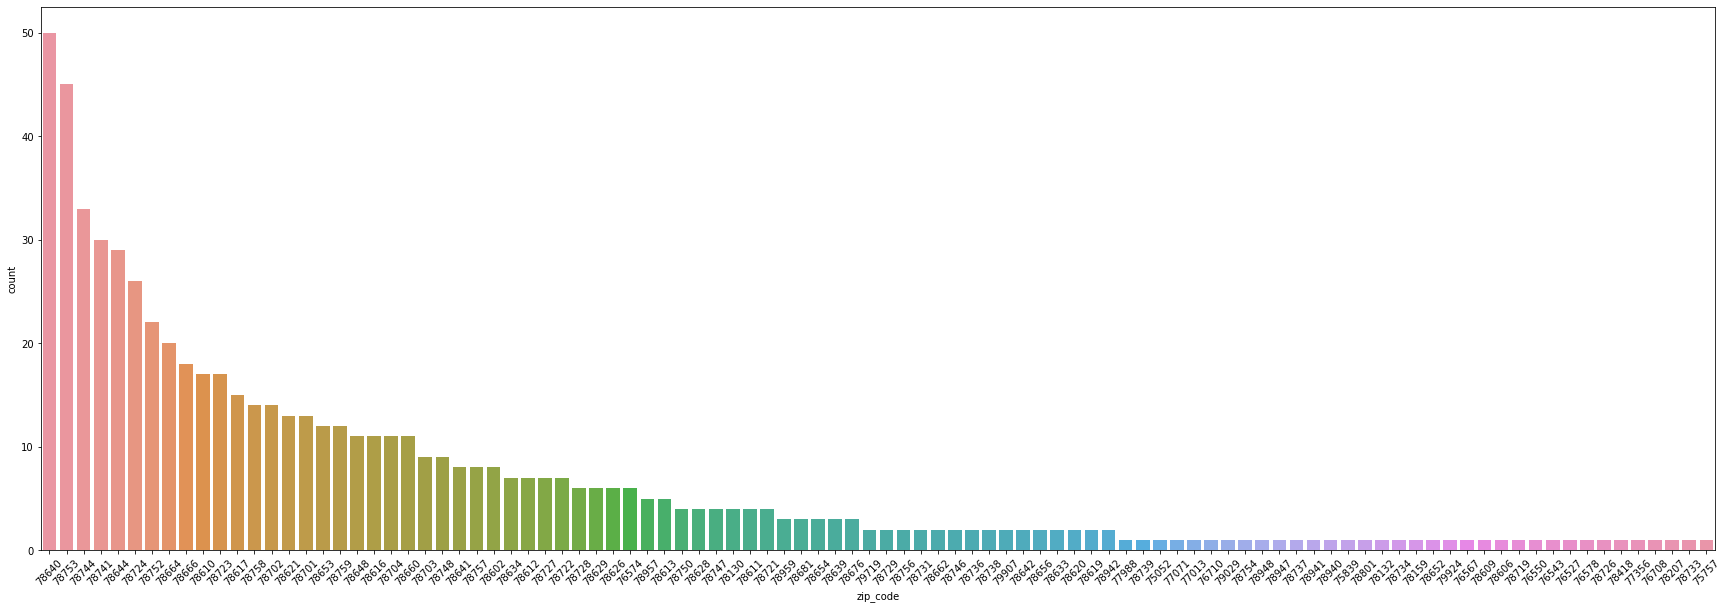

In [23]:
fig, ax = plt.subplots(figsize=(30, 10))
sns.countplot(
    data=df_icu,
    x='zip_code',
    #hue='race_display',
    order=df_icu['zip_code'].value_counts().index)
plt.xticks(rotation=45)
plt.show()

In [24]:
#df_percent = df_icu.groupby(['zip_code']).agg({'deid_fin_encounter': 'count'}).sort_values(by=['deid_fin_encounter'], ascending=False)/len(df_icu)
df_percent = df_icu.groupby('zip_code').agg(['count'])['deid_fin_encounter'].sort_values(by=['count'], ascending=False)/len(df_icu)
df_percent = df_percent.reset_index(level=['zip_code'], col_level=1)
df_percent.rename(columns={'count': 'percentage'}, inplace=True)
df_percent['percentage'] = df_percent['percentage'].round(2)
df_percent

,zip_code,percentage
0,78640,0.08
1,78753,0.07
2,78744,0.05
3,78741,0.05
4,78644,0.04
...,...,...
93,75757,0.00
94,78719,0.00
95,78726,0.00
96,78733,0.00


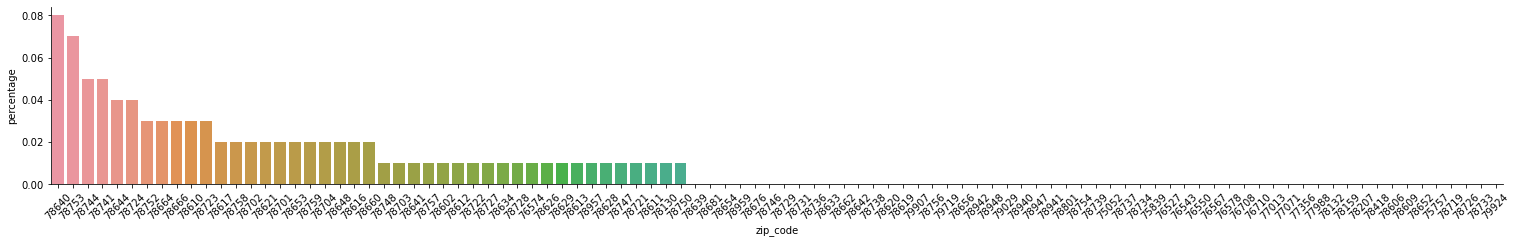

In [25]:
sns.catplot(
    data=df_percent,
    x='zip_code',
    y='percentage',
    kind='bar',
    height=3,
    aspect=7,
    #hue='race_display',
    order=df_percent['zip_code'].values
)
plt.xticks(rotation=45)
plt.show()


## Census Tract ## Social Vulnerable Index (SVI)

### Add census tract #### Add Social Vulnerable Index

It seems that different zip codes indicate one single GEOID(Census Tract)

In [26]:
df_census_tract_tx_travis[df_census_tract_tx_travis.duplicated()==True]

,ZCTA5,STATE,COUNTY,TRACT,GEOID,POPPT,HUPT,AREAPT,AREALANDPT,ZPOP,ZHU,ZAREA,ZAREALAND,TRPOP,TRHU,TRAREA,TRAREALAND,ZPOPPCT,ZHUPCT,ZAREAPCT,ZAREALANDPCT,TRPOPPCT,TRHUPCT,TRAREAPCT,TRAREALANDPCT


In [27]:
df_census_tract_tx_travis[df_census_tract_tx_travis.duplicated(subset=['GEOID'])==True]['GEOID'].unique()

array([48453002433, 48453002436, 48453001854, 48453001765, 48453001766,
       48453001780, 48453001859, 48453002207, 48453002209, 48453002210,
       48453001842, 48453001855, 48453001856, 48453001768, 48453001857,
       48453001100, 48453001200, 48453000601, 48453000401, 48453002432,
       48453002435, 48453980000, 48453002109, 48453002111, 48453000402,
       48453000306, 48453002212, 48453002208, 48453001847, 48453001851,
       48453001785, 48453001786, 48453001714, 48453000101, 48453000102,
       48453001760, 48453001764, 48453001769, 48453001737, 48453001742,
       48453001773, 48453001784, 48453001916, 48453001775, 48453002307,
       48453002310, 48453002411, 48453002428, 48453002431, 48453001712,
       48453001750, 48453002403, 48453001912, 48453002425, 48453002426,
       48453002434, 48453001772, 48453001774, 48453002407, 48453002421,
       48453002422, 48453001740, 48453001749, 48453001777, 48453001716,
       48453000203, 48453000302, 48453002105, 48453001503, 48453

In [28]:
df_census_tract_tx_travis.loc[(df_census_tract_tx_travis.duplicated(subset=['GEOID'])==True) & (df_census_tract_tx_travis['GEOID']==48453002433)]

,ZCTA5,STATE,COUNTY,TRACT,GEOID,POPPT,HUPT,AREAPT,AREALANDPT,ZPOP,ZHU,ZAREA,ZAREALAND,TRPOP,TRHU,TRAREA,TRAREALAND,ZPOPPCT,ZHUPCT,ZAREAPCT,ZAREALANDPCT,TRPOPPCT,TRHUPCT,TRAREAPCT,TRAREALANDPCT
11,78617,48,453,2433,48453002433,5385,1689,67024483,66047566,22210,6027,180906001,179717734,5981,1886,72222670,71008056,24.25,28.02,37.05,36.75,90.04,89.55,92.8,93.01


In [29]:
df_census_tract_tx_travis.loc[df_census_tract_tx_travis['GEOID']==48453002433]

,ZCTA5,STATE,COUNTY,TRACT,GEOID,POPPT,HUPT,AREAPT,AREALANDPT,ZPOP,ZHU,ZAREA,ZAREALAND,TRPOP,TRHU,TRAREA,TRAREALAND,ZPOPPCT,ZHUPCT,ZAREAPCT,ZAREALANDPCT,TRPOPPCT,TRHUPCT,TRAREAPCT,TRAREALANDPCT
4,78612,48,453,2433,48453002433,596,197,5198187,4960490,11457,4274,244502254,243038259,5981,1886,72222670,71008056,5.20,4.61,2.13,2.04,9.96,10.45,7.2,6.99
11,78617,48,453,2433,48453002433,5385,1689,67024483,66047566,22210,6027,180906001,179717734,5981,1886,72222670,71008056,24.25,28.02,37.05,36.75,90.04,89.55,92.8,93.01


In [30]:
df_census_tract_tx_travis.loc[df_census_tract_tx_travis['GEOID']==48453002436]

,ZCTA5,STATE,COUNTY,TRACT,GEOID,POPPT,HUPT,AREAPT,AREALANDPT,ZPOP,ZHU,ZAREA,ZAREALAND,TRPOP,TRHU,TRAREA,TRAREALAND,ZPOPPCT,ZHUPCT,ZAREAPCT,ZAREALANDPCT,TRPOPPCT,TRHUPCT,TRAREAPCT,TRAREALANDPCT
3,78610,48,453,2436,48453002436,340,123,9184558,9184558,23502,8184,240195543,239275955,2672,871,56205411,56205398,1.45,1.50,3.82,3.84,12.72,14.12,16.34,16.34
13,78617,48,453,2436,48453002436,520,163,16916195,16916195,22210,6027,180906001,179717734,2672,871,56205411,56205398,2.34,2.70,9.35,9.41,19.46,18.71,30.10,30.10
105,78719,48,453,2436,48453002436,1629,525,26468659,26468646,1764,586,48313393,48311283,2672,871,56205411,56205398,92.35,89.59,54.79,54.79,60.97,60.28,47.09,47.09
258,78747,48,453,2436,48453002436,183,60,3635999,3635999,14808,5491,61594269,61578835,2672,871,56205411,56205398,1.24,1.09,5.90,5.90,6.85,6.89,6.47,6.47


In [31]:
 df_svi_tx_travis = df_svi_tx_travis.merge(df_census_tract_tx_travis, left_on='FIPS', right_on='GEOID', how='inner').copy()

 print(df_svi_tx_travis.shape)
 df_svi_tx_travis.head()

(362, 149)


,ST,STATE_x,ST_ABBR,STCNTY,COUNTY_x,FIPS,LOCATION,AREA_SQMI,E_TOTPOP,M_TOTPOP,E_HU,M_HU,E_HH,M_HH,E_POV,M_POV,E_UNEMP,M_UNEMP,E_PCI,M_PCI,E_NOHSDP,M_NOHSDP,E_AGE65,M_AGE65,E_AGE17,M_AGE17,E_DISABL,M_DISABL,E_SNGPNT,M_SNGPNT,E_MINRTY,M_MINRTY,E_LIMENG,M_LIMENG,E_MUNIT,M_MUNIT,E_MOBILE,M_MOBILE,E_CROWD,M_CROWD,E_NOVEH,M_NOVEH,E_GROUPQ,M_GROUPQ,EP_POV,MP_POV,EP_UNEMP,MP_UNEMP,EP_PCI,MP_PCI,EP_NOHSDP,MP_NOHSDP,EP_AGE65,MP_AGE65,EP_AGE17,MP_AGE17,EP_DISABL,MP_DISABL,EP_SNGPNT,MP_SNGPNT,EP_MINRTY,MP_MINRTY,EP_LIMENG,MP_LIMENG,EP_MUNIT,MP_MUNIT,EP_MOBILE,MP_MOBILE,EP_CROWD,MP_CROWD,EP_NOVEH,MP_NOVEH,EP_GROUPQ,MP_GROUPQ,EPL_POV,EPL_UNEMP,EPL_PCI,EPL_NOHSDP,SPL_THEME1,RPL_THEME1,EPL_AGE65,EPL_AGE17,EPL_DISABL,EPL_SNGPNT,SPL_THEME2,RPL_THEME2,EPL_MINRTY,EPL_LIMENG,SPL_THEME3,RPL_THEME3,EPL_MUNIT,EPL_MOBILE,EPL_CROWD,EPL_NOVEH,EPL_GROUPQ,SPL_THEME4,RPL_THEME4,SPL_THEMES,RPL_THEMES,F_POV,F_UNEMP,F_PCI,F_NOHSDP,F_THEME1,F_AGE65,F_AGE17,F_DISABL,F_SNGPNT,F_THEME2,F_MINRTY,F_LIMENG,F_THEME3,F_MUNIT,F_MOBILE,F_CROWD,F_NOVEH,F_GROUPQ,F_THEME4,F_TOTAL,E_UNINSUR,M_UNINSUR,EP_UNINSUR,MP_UNINSUR,E_DAYPOP,ZCTA5,STATE_y,COUNTY_y,TRACT,GEOID,POPPT,HUPT,AREAPT,AREALANDPT,ZPOP,ZHU,ZAREA,ZAREALAND,TRPOP,TRHU,TRAREA,TRAREALAND,ZPOPPCT,ZHUPCT,ZAREAPCT,ZAREALANDPCT,TRPOPPCT,TRHUPCT,TRAREAPCT,TRAREALANDPCT
0,48,TEXAS,TX,48453,Travis,48453000101,"Census Tract 1.01, Travis County, Texas",1.206569,4652,418,2273,68,2133,107,294,128,79,61,67846,7009,43,42,783,131,855,120,378,113,139,85,802,505,0,52,729,113,11,18,8,18,140,61,17,39,6.4,2.8,2.8,2.2,67846.0,7009.0,1.3,1.2,16.8,3.3,18.4,2.0,8.2,2.5,6.5,4.0,17.2,10.8,0.0,1.2,32.1,4.9,0.5,0.8,0.4,0.9,6.6,2.8,0.4,0.8,0.2030,0.1882,0.0389,0.0333,0.4634,0.0512,0.7517,0.1391,0.2348,0.2980,1.4236,0.1716,0.0735,0.0000,0.0735,0.0208,0.8535,0.3952,0.1008,0.6693,0.6645,2.6833,0.6702,4.6438,0.1653,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,117,74,2.5,1.6,5986,78703,48,453,101,48453000101,0,0,46469,46469,19690,10425,15173565,14451214,3611,2076,3126682,3126682,0.00,0.00,0.31,0.32,0.00,0.00,1.49,1.49
1,48,TEXAS,TX,48453,Travis,48453000101,"Census Tract 1.01, Travis County, Texas",1.206569,4652,418,2273,68,2133,107,294,128,79,61,67846,7009,43,42,783,131,855,120,378,113,139,85,802,505,0,52,729,113,11,18,8,18,140,61,17,39,6.4,2.8,2.8,2.2,67846.0,7009.0,1.3,1.2,16.8,3.3,18.4,2.0,8.2,2.5,6.5,4.0,17.2,10.8,0.0,1.2,32.1,4.9,0.5,0.8,0.4,0.9,6.6,2.8,0.4,0.8,0.2030,0.1882,0.0389,0.0333,0.4634,0.0512,0.7517,0.1391,0.2348,0.2980,1.4236,0.1716,0.0735,0.0000,0.0735,0.0208,0.8535,0.3952,0.1008,0.6693,0.6645,2.6833,0.6702,4.6438,0.1653,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,117,74,2.5,1.6,5986,78731,48,453,101,48453000101,3611,2076,3080213,3080213,24614,12984,22804475,22253088,3611,2076,3126682,3126682,14.67,15.99,13.51,13.84,100.00,100.00,98.51,98.51
2,48,TEXAS,TX,48453,Travis,48453000102,"Census Tract 1.02, Travis County, Texas",2.125888,2604,170,1193,32,1110,71,45,32,22,22,112935,17709,21,26,704,133,556,75,290,104,18,19,268,248,3,48,17,23,0,13,0,18,8,13,20,9,1.7,1.2,1.7,1.7,112935.0,17709.0,1.1,1.3,27.0,4.9,21.4,2.5,11.1,4.1,1.6,1.7,10.3,9.5,0.1,2.0,1.4,2.0,0.0,3.3,0.0,1.7,0.7,1.2,0.8,0.3,0.0245,0.0724,0.0057,0.0251,0.1277,0.0027,0.9734,0.2477,0.4503,0.0333,1.7047,0.3019,0.0201,0.0386,0.0587,0.0151,0.3347,0.0000,0.0000,0.0915,0.7288,1.1550,0.1105,3.0461,0.0344,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,52,51,2.0,2.0,2850,78703,48,453,102,48453000102,28,19,1608974,1608974,19690,10425,15173565,14451214,2552,1153,5637536,5481065,0.14,0.18,10.60,11.13,1.10,1.65,28.54,29.36
3,48,TEXAS,TX,48453,Travis,48453000102,"Census Tract 1.02, Travis County, Texas",2.125888,2604,170,1193,32,1110,71,45,32,22,22,112935,17709,21,26,704,133,556,75,290,104,18,19,268,248,3,48,17,23,0,13,0,18,8,13,20,9,1.7,1.2,1.7,1.7,112935.0,17709.0,1.1,1.3,27.0,4.9,21.4,2.5,11.1,4.1,1.6,1.7,10.3,9.5,0.1,2.0,1.4,2.0,0.0,3.3,0.0,1.7,0.7,1.2,0.8,0.3,0.0245,0.0724,0.0057,0.0251,0.1277,0.0027,0.9734,0.2477,0.4503,0.0333,1.7047,0.3019,0.0201,0.0386,0.0587,0.0151,0.3347,0.0000,0.0000,0.0915,0.

## Drop necessary columns

In [32]:
cols_sample = [
    'deid_fin_encounter', 'age_at_admit', 'gender', 'race_display', 'insured_uninsured', 
    'zip_code', 'median_income', 'poverty_rate', 'icu_hours_summed', 'vent_hours_summed',
    'SOFA', 'has_comorbidity', 'count_comorbidity', 'life_years', 'discharge_disposition_display',
    'deceased_dt_tm'
    ]

df_sample = df_icu[cols_sample].copy()

print(df_sample.shape)
df_sample.head()

(652, 16)


,deid_fin_encounter,age_at_admit,gender,race_display,insured_uninsured,zip_code,median_income,poverty_rate,icu_hours_summed,vent_hours_summed,SOFA,has_comorbidity,count_comorbidity,life_years,discharge_disposition_display,deceased_dt_tm
0,27818,44,Male,Hispanic or Latino,Insured,78130,65627,9.5,69.48,58.45,11,0,0,56,Expired,3/26/2020 14:10
1,43894,71,Male,Hispanic or Latino,Insured,78130,65627,9.5,598.51,352.62,5,1,2,29,Rehab Care,NaN
2,48974,71,Male,Hispanic or Latino,Insured,78130,65627,9.5,21.50,NaN,1,1,3,29,Skilled Nursing Care,NaN
3,17000,47,Female,White,Insured,78130,65627,9.5,43.03,NaN,0,0,0,53,Still a patient,NaN
4,23744,49,Female,White,Insured,78612,69213,10.6,160.17,293.02,2,0,0,51,Home,NaN


## Distribution of SOFA scores

In [33]:
df_sample_pct = df_sample.groupby(['SOFA']).agg({'deid_fin_encounter': 'count'}).copy()
df_sample_pct['percentage'] = df_sample_pct.loc[:, ['deid_fin_encounter']].apply(lambda x: round(x/x.sum(), 2))
df_sample_pct

,deid_fin_encounter,percentage
SOFA,,
0,138,0.21
1,74,0.11
2,43,0.07
3,60,0.09
4,85,0.13
5,57,0.09
6,49,0.08
7,32,0.05
8,30,0.05


In [34]:
df_sample.loc[df_sample['race_display']=='Asian']

,deid_fin_encounter,age_at_admit,gender,race_display,insured_uninsured,zip_code,median_income,poverty_rate,icu_hours_summed,vent_hours_summed,SOFA,has_comorbidity,count_comorbidity,life_years,discharge_disposition_display,deceased_dt_tm
89,25299,34,Male,Asian,Insured,78741,45835,23.4,199.00,NaN,7,1,2,66,Home,NaN
272,43847,57,Male,Asian,Insured,78653,73496,13.2,373.32,280.60,6,1,1,43,Expired,5/22/2020 2:42
516,46873,69,Female,Asian,Insured,78664,75766,10,629.97,617.02,10,1,1,31,Expired,7/29/2020 11:55
535,27252,53,Female,Asian,Insured,78728,57590,11.4,17.65,NaN,2,1,2,47,Home,NaN
613,41187,69,Female,Asian,Insured,78731,94851,9,24.97,NaN,4,1,4,31,Expired,8/6/2020 3:15


In [35]:
df_sample_svi = df_sample.merge(df_svi_tx_travis, left_on='zip_code', right_on='ZCTA5', how='inner').copy()

print(df_sample_svi.shape)
df_sample_svi.head()

(3882, 165)


,deid_fin_encounter,age_at_admit,gender,race_display,insured_uninsured,zip_code,median_income,poverty_rate,icu_hours_summed,vent_hours_summed,SOFA,has_comorbidity,count_comorbidity,life_years,discharge_disposition_display,deceased_dt_tm,ST,STATE_x,ST_ABBR,STCNTY,COUNTY_x,FIPS,LOCATION,AREA_SQMI,E_TOTPOP,M_TOTPOP,E_HU,M_HU,E_HH,M_HH,E_POV,M_POV,E_UNEMP,M_UNEMP,E_PCI,M_PCI,E_NOHSDP,M_NOHSDP,E_AGE65,M_AGE65,E_AGE17,M_AGE17,E_DISABL,M_DISABL,E_SNGPNT,M_SNGPNT,E_MINRTY,M_MINRTY,E_LIMENG,M_LIMENG,E_MUNIT,M_MUNIT,E_MOBILE,M_MOBILE,E_CROWD,M_CROWD,E_NOVEH,M_NOVEH,E_GROUPQ,M_GROUPQ,EP_POV,MP_POV,EP_UNEMP,MP_UNEMP,EP_PCI,MP_PCI,EP_NOHSDP,MP_NOHSDP,EP_AGE65,MP_AGE65,EP_AGE17,MP_AGE17,EP_DISABL,MP_DISABL,EP_SNGPNT,MP_SNGPNT,EP_MINRTY,MP_MINRTY,EP_LIMENG,MP_LIMENG,EP_MUNIT,MP_MUNIT,EP_MOBILE,MP_MOBILE,EP_CROWD,MP_CROWD,EP_NOVEH,MP_NOVEH,EP_GROUPQ,MP_GROUPQ,EPL_POV,EPL_UNEMP,EPL_PCI,EPL_NOHSDP,SPL_THEME1,RPL_THEME1,EPL_AGE65,EPL_AGE17,EPL_DISABL,EPL_SNGPNT,SPL_THEME2,RPL_THEME2,EPL_MINRTY,EPL_LIMENG,SPL_THEME3,RPL_THEME3,EPL_MUNIT,EPL_MOBILE,EPL_CROWD,EPL_NOVEH,EPL_GROUPQ,SPL_THEME4,RPL_THEME4,SPL_THEMES,RPL_THEMES,F_POV,F_UNEMP,F_PCI,F_NOHSDP,F_THEME1,F_AGE65,F_AGE17,F_DISABL,F_SNGPNT,F_THEME2,F_MINRTY,F_LIMENG,F_THEME3,F_MUNIT,F_MOBILE,F_CROWD,F_NOVEH,F_GROUPQ,F_THEME4,F_TOTAL,E_UNINSUR,M_UNINSUR,EP_UNINSUR,MP_UNINSUR,E_DAYPOP,ZCTA5,STATE_y,COUNTY_y,TRACT,GEOID,POPPT,HUPT,AREAPT,AREALANDPT,ZPOP,ZHU,ZAREA,ZAREALAND,TRPOP,TRHU,TRAREA,TRAREALAND,ZPOPPCT,ZHUPCT,ZAREAPCT,ZAREALANDPCT,TRPOPPCT,TRHUPCT,TRAREAPCT,TRAREALANDPCT
0,23744,49,Female,White,Insured,78612,69213,10.6,160.17,293.02,2,0,0,51,Home,NaN,48,TEXAS,TX,48453,Travis,48453002433,"Census Tract 24.33, Travis County, Texas",27.419913,9190,808,2530,84,2415,102,1126,613,217,144,22191,3013,1339,291,485,73,3256,512,940,342,286,149,7695,849,494,193,0,26,645,153,137,107,62,60,0,19,12.3,6.5,4.7,3.0,22191.0,3013.0,26.3,5.6,5.3,0.9,35.4,4.6,10.2,3.4,11.8,6.2,83.7,5.6,5.9,2.3,0.0,1.1,25.5,5.9,5.7,4.4,2.6,2.5,0.0,0.2,0.4358,0.4544,0.6263,0.7435,2.26,0.5863,0.0809,0.9474,0.389,0.6339,2.0512,0.517,0.7565,0.5928,1.3493,0.6875,0.0,0.9037,0.6563,0.3399,0.0,1.8999,0.3286,7.5604,0.5411,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,2,1910,542,20.8,6.1,6074,78612,48,453,2433,48453002433,596,197,5198187,4960490,11457,4274,244502254,243038259,5981,1886,72222670,71008056,5.2,4.61,2.13,2.04,9.96,10.45,7.2,6.99
1,45992,26,Female,Hispanic or Latino,Insured,78612,69213,10.6,31.97,NaN,1,0,0,74,Home,NaN,48,TEXAS,TX,48453,Travis,48453002433,"Census Tract 24.33, Travis County, Texas",27.419913,9190,808,2530,84,2415,102,1126,613,217,144,22191,3013,1339,291,485,73,3256,512,940,342,286,149,7695,849,494,193,0,26,645,153,137,107,62,60,0,19,12.3,6.5,4.7,3.0,22191.0,3013.0,26.3,5.6,5.3,0.9,35.4,4.6,10.2,3.4,11.8,6.2,83.7,5.6,5.9,2.3,0.0,1.1,25.5,5.9,5.7,4.4,2.6,2.5,0.0,0.2,0.4358,0.4544,0.6263,0.7435,2.26,0.5863,0.0809,0.9474,0.389,0.6339,2.0512,0.517,0.7565,0.5928,1.3493,0.6875,0.0,0.9037,0.6563,0.3399,0.0,1.8999,0.3286,7.5604,0.5411,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,2,1910,542,20.8,6.1,6074,78612,48,453,2433,48453002433,596,197,5198187,4960490,11457,4274,244502254,243038259,5981,1886,72222670,71008056,5.2,4.61,2.13,2.04,9.96,10.45,7.2,6.99
2,36262,70,Male,Hispanic or Latino,Insured,78612,69213,10.6,600.23,465.20,6,1,2,30,Expired,10/23/2020 12:35,48,TEXAS,TX,48453,Travis,48453002433,"Census Tract 24.33, Travis County, Texas",27.419913,9190,808,2530,84,2415,102,1126,613,217,144,22191,3013,1339,291,485,73,3256,512,940,342,286,149,7695,849,494,193,0,26,645,153,137,107,62,60,0,19,12.3,6.5,4.7,3.0,22191.0,3013.0,26.3,5.6,5.3,0.9,35.4,4.6,10.2,3.4,11.8,6.2,83.7,5.6,5.9,2.3,0.0,1.1,25.5,5.9,5.7,4.4,2.6,2.5,0.0,0.2,0.4358,0.4544,0.6263,0.7435,2.26,0.5863,0.0809,0.9474,0.389,0.6339,2.0512,0.517,0.7565,0.5928,1.3493,0.6875,0.0,0.9037,0.6563,0.3399,0.0,1.8999,0.3286,7.5604,0.5411,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,2,1910,542,20.8,6.1,6074,78612,48,453,2433,48453002433,596,197,5198187,4960490,11457,4274,244502254,243038259,5981,1886,7

In [36]:
count_race = Counter(df_sample['race_display'])
count_race

Counter({'Hispanic or Latino': 358,
         'White': 235,
         'Black or African American': 54,
         'Asian': 5})

In [37]:
df_left = df_sample.groupby(['SOFA'])[['deid_fin_encounter']].agg('count').reset_index(level=['SOFA'], col_level=1).rename(columns={'deid_fin_encounter': 'num_patients'})
df_right = df_sample.loc[df_sample['discharge_disposition_display']=='Expired'].groupby(['SOFA'])[['deid_fin_encounter']].agg('count').reset_index(level=['SOFA'], col_level=1).rename(columns={'deid_fin_encounter': 'num_death'})

In [38]:
df_center = df_left.merge(df_right, on='SOFA', how='left')
#df_center['num_patients']/df_center['num_death']
df_center['percentage_death'] = round(df_center['num_death']/df_center['num_patients']*100, 0)
df_center

,SOFA,num_patients,num_death,percentage_death
0,0,138,3.0,2.0
1,1,74,3.0,4.0
2,2,43,4.0,9.0
3,3,60,15.0,25.0
4,4,85,20.0,24.0
5,5,57,16.0,28.0
6,6,49,21.0,43.0
7,7,32,9.0,28.0
8,8,30,14.0,47.0
9,9,35,19.0,54.0


# Develop allocation

In [143]:
iter_simulation = 1000  # The number of simulations

vent_availability_pct = np.linspace(0,1,11)   # Percentage of ventilator availability
vent_availability_pct.round(1)

class Allocation(object):
  
    def __init__(self, df, vent_availability_pct, calibration_sofa_mortality):
        self.patients = df.copy() 
        self.patients['death'] = [0 for _ in range(len(self.patients))]             # All patients initially survive
        self.patients['allocate_vent'] = [0 for _ in range(len(self.patients))]     # All patients are not initially allocated to ventilators  
        self.num_vent = int(len(self.patients) * vent_availability_pct)             # Number of ventilators available
        self.model_mortality = calibration_sofa_mortality

    def __run_allocation(self, df):
        df_prioritized = df.copy()
        print(self.num_vent)
        num_vent_tmp = self.num_vent
        
        for i, patient in df_prioritized.iterrows():     # Allocate ventilators

            if num_vent_tmp == 0:                      # If no more ventialtors available, then stop allocating ventilators
                break
            
            df_prioritized.loc[i, 'allocate_vent'] = 1
            num_vent_tmp -= 1

        if df_prioritized.loc[df_prioritized['allocate_vent']==1].empty == False:
            df_count_death_allocated = self.mortality_allocated(df_prioritized.loc[df_prioritized['allocate_vent']==1].copy())

        if df_prioritized.loc[df_prioritized['allocate_vent']==0].empty == False:
            df_count_death_allocated_not = self.mortality_allocated_not(df_prioritized.loc[df_prioritized['allocate_vent']==0].copy())

        if self.num_vent == 0:
            display(df_count_death_allocated_not)
            return df_count_death_allocated_not

        elif self.num_vent == len(self.patients):
            display(df_count_death_allocated)
            return df_count_death_allocated

        else:
            df_count_death_final = df_count_death_allocated.set_index('race_display').add(df_count_death_allocated_not.set_index('race_display'), fill_value=0).reset_index()
            display(df_count_death_final)
            return df_count_death_final
    
    def mortality_allocated(self, df):
    
        df_tmp = df.groupby(['SOFA', 'race_display'])[['deid_fin_encounter']].agg(['count']).copy()
        df_tmp = df_tmp.reset_index(level=['SOFA', 'race_display'], col_level=1)
        df_tmp.columns = df_tmp.columns.droplevel(0)
       
        for i, value in df_tmp.iterrows():
            df_tmp.loc[i, 'mortality rate'] = self.model_mortality[df_tmp.loc[i, 'SOFA']] * 0.01
            df_tmp.loc[i, 'expected_death'] = round(df_tmp.loc[i, 'count'] * self.model_mortality[df_tmp.loc[i, 'SOFA']] * 0.01, 2)
        
        display(df_tmp)
        df_tmp = df_tmp.groupby('race_display')[['expected_death']].agg(['sum'])
        df_tmp = df_tmp.reset_index(level=['race_display'], col_level=1)
        df_tmp.columns = df_tmp.columns.droplevel(0)
        
        return df_tmp
        
    def mortality_allocated_not(self, df): # Mortality for patients not admitted to ventilators

        for i, patient in df.iterrows():
            df.loc[i, 'death'] = 1  # Assumption in Chicago
            '''if (pd.notna(patient['vent_hours_summed'])) or patient.discharge_disposition_display == 'Expired':  # A patient did not receive a ventilator in the observed data and the simulation
                df.loc[i, 'death'] = 1
            else:
                df.loc[i, 'death'] = 0'''
        
        df_tmp = df.loc[df['death']==1].groupby(['SOFA', 'race_display'])[['death']].agg(['count']).copy()
        df_tmp = df_tmp.reset_index(level=['SOFA', 'race_display'], col_level=1)
        df_tmp.columns = df_tmp.columns.droplevel(0)

        df_tmp = df_tmp.groupby('race_display')[['count']].agg(['sum']).copy()
        df_tmp = df_tmp.reset_index(level=['race_display'], col_level=1)
        df_tmp.columns = df_tmp.columns.droplevel(0)

        return df_tmp

    def __run_allocation_simulator(self, df):    
    
        for i, patient in df.iterrows():

            if self.num_vent == 0: # No more ventialtors and stop allocation
                break
            
            mortality, allocation = self.mortality_allocated_simulator(patient)
            
            df.loc[i, 'death'] = mortality
            df.loc[i, 'allocate_vent'] = allocation
            
            self.num_vent -= 1 

        df_allocated = df.loc[df['allocate_vent']==1].copy()
        df_allocated_not = df.loc[df['allocate_vent']==0].copy()

        df_patients_allocated_not_adj = self.mortality_allocated_not_simulator(df_allocated_not)
  
        df_tmp = pd.concat([df_allocated, df_patients_allocated_not_adj])

        df_tmp = df_tmp.groupby(['race_display'])[['death']].agg(['sum']).copy()

        df_tmp = df_tmp.reset_index(level=['race_display'], col_level=1)
        df_tmp.columns = df_tmp.columns.droplevel(0)
  
        return df_tmp    
    
    def mortality_allocated_simulator(self, patient):
        prob = self.model_mortality[patient['SOFA']]            # Mortality probability for each qSOFA score
        death = np.random.binomial(size=1, n=1, p=prob*.01)[0]  # Death depending on mortality probability
        
        if death == 1 or patient['discharge_disposition_display'] == 'Expired':
            return death, 1
            
        else:
            return death, 1
    
    def mortality_allocated_not_simulator(self, df):

        for i, patient in df.iterrows():
            df.loc[i, 'death'] = 1
            '''if (pd.notna(patient['vent_hours_summed'])) or patient['discharge_disposition_display'] == 'Expired':
                df.loc[i, 'death'] = 1
                
            else:
                df.loc[i, 'death'] = 0'''
        
        return df
    
    def __categorize_age(self, patient):    # Life-cycle consideration delineated in Maryland CSC
        if patient.age_at_admit < 50:
            return 1 
        elif patient.age_at_admit < 70: 
            return 2 
        elif patient.age_at_admit < 85:
            return 3 
        else:
            return 4
    
    def maryland(self):
        df_patients = self.patients.copy()

        # Assign patients into age catetory
        df_patients['cat_age'] = df_patients.apply(lambda patient: self.__categorize_age(patient), axis=1)     # Categorize patients' age
    
        # Prioritize patients who have lower SOFA score first, then small amount of comorbidities, and finally are in youger age category first
        df_patients.sort_values(by=['SOFA', 'count_comorbidity', 'cat_age'], ascending=[True, True, True], inplace=True)
        df_prioritized = df_patients.copy()
        # Allocate ventilators to patients
        df_allocated = self.__run_allocation(df_prioritized)

        return df_allocated 

    def max_lives_saved(self):
        df_patients = self.patients.copy()
        
        # Prioritize patients who have lower SOFA scores first
        df_patients.sort_values(by=['SOFA'], ascending=True, inplace=True)
        df_prioritized = df_patients.copy()
        
        # Allocate ventilators to patients
        df_allocated = self.__run_allocation(df_prioritized)

        return df_allocated 
    
    def max_life_years(self):
        df_patients = self.patients.copy()

        # Prioritize patients who have lower SOFA scores and then more life years to live
        df_patients.sort_values(by=['SOFA', 'life_years'], ascending=[True,False], inplace=True)
        df_prioritized = df_patients.copy()

        # Allocate ventilators to patients
        df_allocated = self.__run_allocation(df_prioritized)

        return df_allocated 
    
    def youngest(self):
        df_patients = self.patients.copy()
        
        # Prioritize patients who are younger first
        df_patients.sort_values(by=['age_at_admit'], ascending=True, inplace=True)
        df_prioritized = df_patients.copy()
        
        # Allocate ventilators to patients
        df_allocated = self.__run_allocation(df_prioritized)

        return df_allocated 
        
    def sickest(self):
        df_patients = self.patients.copy()
        
        # Prioritize patients who have higher SOFA scores first
        df_patients.sort_values(by=['SOFA'], ascending=False, inplace=True)
        df_prioritized = df_patients.copy()
        df_prioritized.reset_index(inplace=True)

        #print(df_prioritized.loc[df_prioritized.index==(self.num_vent-1), 'SOFA'])
        #tie_sofa = df_prioritized.loc[df_prioritized.index==(self.num_vent-1), 'SOFA'].values
        #print(tie_sofa)
        #display(df_prioritized.iloc[[:self.num_vent]])
        #display(df_prioritized[df_prioritized.index<self.num_vent])
        
        # Allocate ventilators to patients
        df_allocated = self.__run_allocation(df_prioritized)

        return df_allocated

    def new_york(self):
        df_patients = self.patients.copy()

        # Prioritize patients by shuffling orders within patients having the same qSOFA scores
        groups_sofa = [df for _, df in df_patients.groupby('SOFA')]      # Group patients based on qSOFA scores
        random.shuffle(groups_sofa)                                             # Shuffle patients in each qSOFA score group randomly
        df_prioritized = pd.concat(groups_sofa).reset_index(drop=True)             # Re-combine groups seperated by qSOFA scores
        df_prioritized.sort_values('SOFA', ascending=True, inplace=True)     # Sort patients by qSOFA scores in ascending order
        
        df_allocated = self.__run_allocation_simulator(df_prioritized)
        
        return df_allocated

    def lottery(self):
        df_patients = self.patients.copy()
        
        # Prioritize patients by shuffling them and get a sample including all patients(frac=1)
        df_patients.sample(frac=1)
        df_prioritized = df_patients.copy()
        
        # Allocate ventilators to patients
        df_allocated = self.__run_allocation_simulator(df_prioritized)

        return df_allocated 
        

# Allocate ventilators (Baseline)

In [119]:
death_race_baseline = Counter(df_sample.loc[df_sample['discharge_disposition_display']=='Expired']['race_display'])
pd.DataFrame.from_dict(death_race_baseline, orient='index', columns=['count_death']).reset_index().rename(columns={'index': 'race'})

,race,count_death
0,Hispanic or Latino,87
1,White,46
2,Black or African American,16
3,Asian,3


In [120]:
avg_death_baseline = statistics.mean(death_race_baseline.values())  # Average of deaths for all racial groups
death_race_baseline = pd.DataFrame(death_race_baseline.items(), columns=['race', 'count_death'])
death_race_baseline['level'] = 2.0   # Nothing about scarcity level
death_race_baseline['avg_death'] = avg_death_baseline
death_race_baseline['percentage_death'] = death_race_baseline.apply(lambda row: percentage_death(row), axis=1)  # Ratio of death for each racial group from total deaths
death_race_baseline['type_allocation'] = 'Baseline'
death_race_baseline

,race,count_death,level,avg_death,percentage_death,type_allocation
0,Hispanic or Latino,87,2.0,38,24.301676,Baseline
1,White,46,2.0,38,19.574468,Baseline
2,Black or African American,16,2.0,38,29.629630,Baseline
3,Asian,3,2.0,38,60.000000,Baseline


# Allocate ventilators (Analytical approach)

## Maryland

In [144]:
ls_df_alloc_level = []          # List of prioritized patients for each scarcity level
ls_df_count_death_race = []

for pct in vent_availability_pct:
    print('------------------------------{}------------------------------'.format(round(pct, 1)))
    allocation = Allocation(df_sample, pct, calibration_sofa_mortality)   # Generate Allocation object
    df_death = allocation.maryland()                                      # Prioritize patients following Maryland CSC

    # Count of deaths for each racial group in each scarcity level
    dict_count_death_race = Counter(df_death['race_display'])

    df_death.rename(columns={'race_display': 'race', 'sum': 'count_death'}, inplace=True)

    df_death['level'] = round(pct, 1)
    df_death['avg_death'] = statistics.mean(df_death.loc[: ,'count_death'])
    df_death['percentage_death'] = df_death.apply(lambda row: percentage_death(row), axis=1)

    ls_df_count_death_race.append(df_death)

df_maryland = pd.concat(ls_df_count_death_race)
df_maryland['type_allocation'] = 'Maryland'
df_baseline_maryland = pd.concat([death_race_baseline, df_maryland])
df_baseline_maryland[['count_death', 'avg_death', 'percentage_death']] = df_baseline_maryland[['count_death', 'avg_death', 'percentage_death']].round(0).astype(int)
display(df_baseline_maryland)


------------------------------0.0------------------------------
0


,race_display,sum
0,Asian,5
1,Black or African American,54
2,Hispanic or Latino,358
3,White,235


------------------------------0.1------------------------------
65


,SOFA,race_display,count,mortality rate,expected_death
0,0,Black or African American,3,0.0,0.0
1,0,Hispanic or Latino,28,0.0,0.0
2,0,White,34,0.0,0.0


,race_display,sum
0,Asian,5.0
1,Black or African American,51.0
2,Hispanic or Latino,330.0
3,White,201.0


------------------------------0.2------------------------------
130


,SOFA,race_display,count,mortality rate,expected_death
0,0,Black or African American,6,0.0,0.0
1,0,Hispanic or Latino,67,0.0,0.0
2,0,White,57,0.0,0.0


,race_display,sum
0,Asian,5.0
1,Black or African American,48.0
2,Hispanic or Latino,291.0
3,White,178.0


------------------------------0.3------------------------------
195


,SOFA,race_display,count,mortality rate,expected_death
0,0,Black or African American,6,0.0,0.0
1,0,Hispanic or Latino,72,0.0,0.0
2,0,White,60,0.0,0.0
3,1,Black or African American,5,0.0,0.0
4,1,Hispanic or Latino,29,0.0,0.0
5,1,White,23,0.0,0.0


,race_display,sum
0,Asian,5.0
1,Black or African American,43.0
2,Hispanic or Latino,257.0
3,White,152.0


------------------------------0.4------------------------------
260


,SOFA,race_display,count,mortality rate,expected_death
0,0,Black or African American,6,0.000,0.00
1,0,Hispanic or Latino,72,0.000,0.00
2,0,White,60,0.000,0.00
3,1,Black or African American,8,0.000,0.00
4,1,Hispanic or Latino,33,0.000,0.00
5,1,White,33,0.000,0.00
6,2,Asian,1,0.064,0.06
7,2,Black or African American,6,0.064,0.38
8,2,Hispanic or Latino,19,0.064,1.22
9,2,White,17,0.064,1.09


,race_display,sum
0,Asian,4.06
1,Black or African American,34.38
2,Hispanic or Latino,230.54
3,White,126.09


------------------------------0.5------------------------------
326


,SOFA,race_display,count,mortality rate,expected_death
0,0,Black or African American,6,0.000,0.00
1,0,Hispanic or Latino,72,0.000,0.00
2,0,White,60,0.000,0.00
3,1,Black or African American,8,0.000,0.00
4,1,Hispanic or Latino,33,0.000,0.00
5,1,White,33,0.000,0.00
6,2,Asian,1,0.064,0.06
7,2,Black or African American,6,0.064,0.38
8,2,Hispanic or Latino,19,0.064,1.22
9,2,White,17,0.064,1.09


,race_display,sum
0,Asian,4.06
1,Black or African American,30.64
2,Hispanic or Latino,193.54
3,White,106.57


------------------------------0.6------------------------------
391


,SOFA,race_display,count,mortality rate,expected_death
0,0,Black or African American,6,0.000,0.00
1,0,Hispanic or Latino,72,0.000,0.00
2,0,White,60,0.000,0.00
3,1,Black or African American,8,0.000,0.00
4,1,Hispanic or Latino,33,0.000,0.00
5,1,White,33,0.000,0.00
6,2,Asian,1,0.064,0.06
7,2,Black or African American,6,0.064,0.38
8,2,Hispanic or Latino,19,0.064,1.22
9,2,White,17,0.064,1.09


,race_display,sum
0,Asian,4.06
1,Black or African American,28.25
2,Hispanic or Latino,163.22
3,White,87.42


------------------------------0.7------------------------------
456


,SOFA,race_display,count,mortality rate,expected_death
0,0,Black or African American,6,0.000,0.00
1,0,Hispanic or Latino,72,0.000,0.00
2,0,White,60,0.000,0.00
3,1,Black or African American,8,0.000,0.00
4,1,Hispanic or Latino,33,0.000,0.00
5,1,White,33,0.000,0.00
6,2,Asian,1,0.064,0.06
7,2,Black or African American,6,0.064,0.38
8,2,Hispanic or Latino,19,0.064,1.22
9,2,White,17,0.064,1.09


,race_display,sum
0,Asian,3.26
1,Black or African American,24.26
2,Hispanic or Latino,136.08
3,White,67.47


------------------------------0.8------------------------------
521


,SOFA,race_display,count,mortality rate,expected_death
0,0,Black or African American,6,0.000,0.00
1,0,Hispanic or Latino,72,0.000,0.00
2,0,White,60,0.000,0.00
3,1,Black or African American,8,0.000,0.00
4,1,Hispanic or Latino,33,0.000,0.00
5,1,White,33,0.000,0.00
6,2,Asian,1,0.064,0.06
7,2,Black or African American,6,0.064,0.38
8,2,Hispanic or Latino,19,0.064,1.22
9,2,White,17,0.064,1.09


,race_display,sum
0,Asian,1.70
1,Black or African American,16.42
2,Hispanic or Latino,107.82
3,White,54.11


------------------------------0.9------------------------------
586


,SOFA,race_display,count,mortality rate,expected_death
0,0,Black or African American,6,0.000,0.00
1,0,Hispanic or Latino,72,0.000,0.00
2,0,White,60,0.000,0.00
3,1,Black or African American,8,0.000,0.00
4,1,Hispanic or Latino,33,0.000,0.00
5,1,White,33,0.000,0.00
6,2,Asian,1,0.064,0.06
7,2,Black or African American,6,0.064,0.38
8,2,Hispanic or Latino,19,0.064,1.22
9,2,White,17,0.064,1.09


,race_display,sum
0,Asian,1.70
1,Black or African American,12.17
2,Hispanic or Latino,80.20
3,White,40.62


------------------------------1.0------------------------------
652


,SOFA,race_display,count,mortality rate,expected_death
0,0,Black or African American,6,0.000,0.00
1,0,Hispanic or Latino,72,0.000,0.00
2,0,White,60,0.000,0.00
3,1,Black or African American,8,0.000,0.00
4,1,Hispanic or Latino,33,0.000,0.00
5,1,White,33,0.000,0.00
6,2,Asian,1,0.064,0.06
7,2,Black or African American,6,0.064,0.38
8,2,Hispanic or Latino,19,0.064,1.22
9,2,White,17,0.064,1.09


,race_display,sum
0,Asian,1.20
1,Black or African American,9.90
2,Hispanic or Latino,63.21
3,White,33.56


,race,count_death,level,avg_death,percentage_death,type_allocation
0,Hispanic or Latino,87,2.0,38,24,Baseline
1,White,46,2.0,38,20,Baseline
2,Black or African American,16,2.0,38,30,Baseline
3,Asian,3,2.0,38,60,Baseline
0,Asian,5,0.0,163,100,Maryland
1,Black or African American,54,0.0,163,100,Maryland
2,Hispanic or Latino,358,0.0,163,100,Maryland
3,White,235,0.0,163,100,Maryland
0,Asian,5,0.1,147,100,Maryland
1,Black or African American,51,0.1,147,94,Maryland


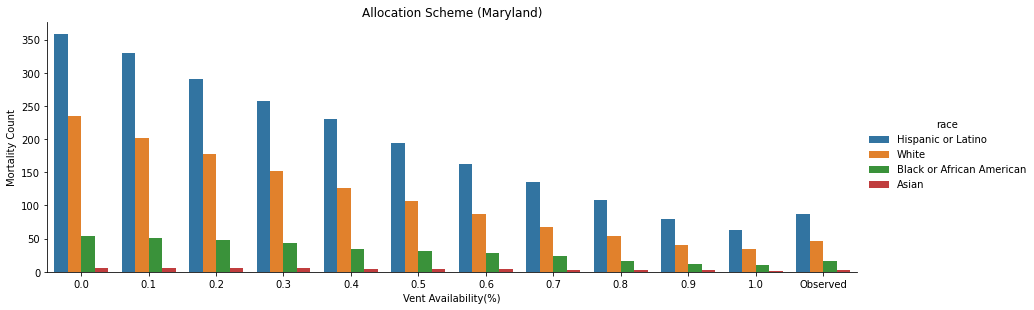

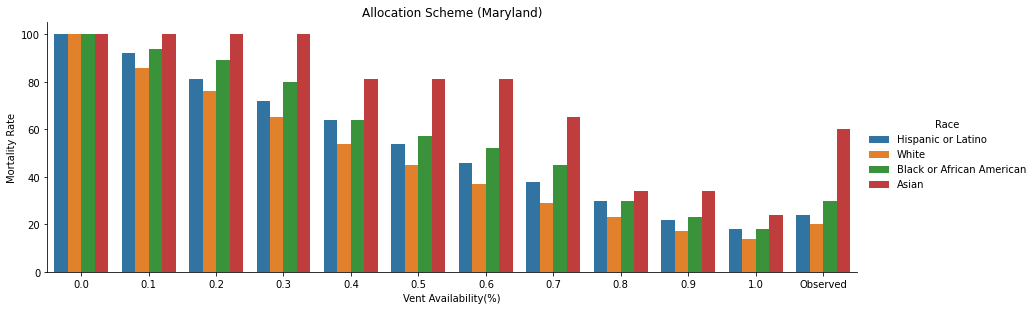

In [122]:
visualize_count_mortality(df_baseline_maryland, 'Maryland')
visualize_percentage_mortality(df_baseline_maryland, 'Maryland')

## Max Lives Years

In [123]:
ls_df_alloc_level = []          # List of prioritized patients for each scarcity level
ls_df_count_death_race = []

for pct in vent_availability_pct:
    print('------------------------------{}------------------------------'.format(round(pct, 1)))
    allocation = Allocation(df_sample, pct, calibration_sofa_mortality)   # Generate Allocation object
    df_death = allocation.max_life_years()                                         # Prioritize patients following Maryland CSC

    # Count of deaths for each racial group in each scarcity level
    dict_count_death_race = Counter(df_death['race_display'])

    df_death.rename(columns={'race_display': 'race', 'sum': 'count_death'}, inplace=True)
    
    df_death['level'] = round(pct, 1)
    df_death['avg_death'] = statistics.mean(df_death.loc[: ,'count_death'])
    df_death['percentage_death'] = df_death.apply(lambda row: percentage_death(row), axis=1)

    ls_df_count_death_race.append(df_death)

df_max_lives_years = pd.concat(ls_df_count_death_race)
df_max_lives_years['type_allocation'] = 'Max Lives Years'
df_baseline_max_lives_years = pd.concat([death_race_baseline, df_max_lives_years])
df_baseline_max_lives_years[['count_death', 'avg_death', 'percentage_death']] = df_baseline_max_lives_years[['count_death', 'avg_death', 'percentage_death']].round(0).astype(int)

------------------------------0.0------------------------------
0
Check Tie


,race_display,sum
0,Asian,5
1,Black or African American,54
2,Hispanic or Latino,358
3,White,235


,race_display,sum
0,Asian,5
1,Black or African American,54
2,Hispanic or Latino,358
3,White,235


------------------------------0.1------------------------------
65
Check Tie
0


,SOFA,race_display,allocate_vent


60


,SOFA,race_display,allocate_vent
647,3,Black or African American,0
359,3,Hispanic or Latino,0
260,3,Hispanic or Latino,0
430,3,White,0
578,3,Hispanic or Latino,0
42,3,Hispanic or Latino,0
165,3,Hispanic or Latino,0
451,3,Hispanic or Latino,0
64,3,White,0
330,3,Hispanic or Latino,0


,SOFA,race_display,count,mortality rate,expected_death
0,0,Black or African American,4,0.0,0.0
1,0,Hispanic or Latino,28,0.0,0.0
2,0,White,33,0.0,0.0


,race_display,sum
0,Black or African American,0.0
1,Hispanic or Latino,0.0
2,White,0.0


,race_display,sum
0,Asian,5
1,Black or African American,50
2,Hispanic or Latino,330
3,White,202


,race_display,sum
0,Asian,5.0
1,Black or African American,50.0
2,Hispanic or Latino,330.0
3,White,202.0


------------------------------0.2------------------------------
130
Check Tie
130


,SOFA,race_display,allocate_vent
360,0,Hispanic or Latino,1
633,0,White,1
548,0,Hispanic or Latino,1
346,0,White,1
116,0,White,1
...,...,...,...
473,0,Hispanic or Latino,1
532,0,White,1
637,0,Hispanic or Latino,1
234,0,White,1


8


,SOFA,race_display,allocate_vent
27,0,Hispanic or Latino,0
428,0,Hispanic or Latino,0
459,0,White,0
440,0,White,0
539,0,White,0
187,0,White,0
184,0,Hispanic or Latino,0
280,0,Hispanic or Latino,0


,SOFA,race_display,count,mortality rate,expected_death
0,0,Black or African American,6,0.0,0.0
1,0,Hispanic or Latino,68,0.0,0.0
2,0,White,56,0.0,0.0


,race_display,sum
0,Black or African American,0.0
1,Hispanic or Latino,0.0
2,White,0.0


,race_display,sum
0,Asian,5
1,Black or African American,48
2,Hispanic or Latino,290
3,White,179


,race_display,sum
0,Asian,5.0
1,Black or African American,48.0
2,Hispanic or Latino,290.0
3,White,179.0


------------------------------0.3------------------------------
195
Check Tie
57


,SOFA,race_display,allocate_vent
384,1,Hispanic or Latino,1
528,1,Hispanic or Latino,1
567,1,White,1
648,1,White,1
628,1,White,1
127,1,White,1
438,1,Hispanic or Latino,1
5,1,Hispanic or Latino,1
408,1,Hispanic or Latino,1
626,1,Hispanic or Latino,1


17


,SOFA,race_display,allocate_vent
198,1,White,0
60,1,Black or African American,0
262,1,Hispanic or Latino,0
614,1,White,0
188,1,White,0
206,1,White,0
193,1,White,0
194,1,White,0
266,1,Hispanic or Latino,0
404,1,White,0


,SOFA,race_display,count,mortality rate,expected_death
0,0,Black or African American,6,0.0,0.0
1,0,Hispanic or Latino,72,0.0,0.0
2,0,White,60,0.0,0.0
3,1,Black or African American,6,0.0,0.0
4,1,Hispanic or Latino,27,0.0,0.0
5,1,White,24,0.0,0.0


,race_display,sum
0,Black or African American,0.0
1,Hispanic or Latino,0.0
2,White,0.0


,race_display,sum
0,Asian,5
1,Black or African American,42
2,Hispanic or Latino,259
3,White,151


,race_display,sum
0,Asian,5.0
1,Black or African American,42.0
2,Hispanic or Latino,259.0
3,White,151.0


------------------------------0.4------------------------------
260
Check Tie
138


,SOFA,race_display,allocate_vent
360,0,Hispanic or Latino,1
633,0,White,1
548,0,Hispanic or Latino,1
346,0,White,1
116,0,White,1
...,...,...,...
440,0,White,1
539,0,White,1
187,0,White,1
184,0,Hispanic or Latino,1


0


,SOFA,race_display,allocate_vent


,SOFA,race_display,count,mortality rate,expected_death
0,0,Black or African American,6,0.000,0.00
1,0,Hispanic or Latino,72,0.000,0.00
2,0,White,60,0.000,0.00
3,1,Black or African American,8,0.000,0.00
4,1,Hispanic or Latino,33,0.000,0.00
5,1,White,33,0.000,0.00
6,2,Asian,1,0.064,0.06
7,2,Black or African American,6,0.064,0.38
8,2,Hispanic or Latino,19,0.064,1.22
9,2,White,17,0.064,1.09


,race_display,sum
0,Asian,0.06
1,Black or African American,0.44
2,Hispanic or Latino,1.41
3,White,1.15


,race_display,sum
0,Asian,4
1,Black or African American,33
2,Hispanic or Latino,231
3,White,124


,race_display,sum
0,Asian,4.06
1,Black or African American,33.44
2,Hispanic or Latino,232.41
3,White,125.15


------------------------------0.5------------------------------
326
Check Tie
138


,SOFA,race_display,allocate_vent
360,0,Hispanic or Latino,1
633,0,White,1
548,0,Hispanic or Latino,1
346,0,White,1
116,0,White,1
...,...,...,...
440,0,White,1
539,0,White,1
187,0,White,1
184,0,Hispanic or Latino,1


0


,SOFA,race_display,allocate_vent


,SOFA,race_display,count,mortality rate,expected_death
0,0,Black or African American,6,0.000,0.00
1,0,Hispanic or Latino,72,0.000,0.00
2,0,White,60,0.000,0.00
3,1,Black or African American,8,0.000,0.00
4,1,Hispanic or Latino,33,0.000,0.00
5,1,White,33,0.000,0.00
6,2,Asian,1,0.064,0.06
7,2,Black or African American,6,0.064,0.38
8,2,Hispanic or Latino,19,0.064,1.22
9,2,White,17,0.064,1.09


,race_display,sum
0,Asian,0.06
1,Black or African American,0.84
2,Hispanic or Latino,5.14
3,White,2.77


,race_display,sum
0,Asian,4
1,Black or African American,29
2,Hispanic or Latino,190
3,White,103


,race_display,sum
0,Asian,4.06
1,Black or African American,29.84
2,Hispanic or Latino,195.14
3,White,105.77


------------------------------0.6------------------------------
391
Check Tie
60


,SOFA,race_display,allocate_vent
647,3,Black or African American,1
359,3,Hispanic or Latino,1
260,3,Hispanic or Latino,1
430,3,White,1
578,3,Hispanic or Latino,1
42,3,Hispanic or Latino,1
165,3,Hispanic or Latino,1
451,3,Hispanic or Latino,1
64,3,White,1
330,3,Hispanic or Latino,1


0


,SOFA,race_display,allocate_vent


,SOFA,race_display,count,mortality rate,expected_death
0,0,Black or African American,6,0.000,0.00
1,0,Hispanic or Latino,72,0.000,0.00
2,0,White,60,0.000,0.00
3,1,Black or African American,8,0.000,0.00
4,1,Hispanic or Latino,33,0.000,0.00
5,1,White,33,0.000,0.00
6,2,Asian,1,0.064,0.06
7,2,Black or African American,6,0.064,0.38
8,2,Hispanic or Latino,19,0.064,1.22
9,2,White,17,0.064,1.09


,race_display,sum
0,Asian,0.26
1,Black or African American,1.25
2,Hispanic or Latino,13.01
3,White,7.42


,race_display,sum
0,Asian,3
1,Black or African American,27
2,Hispanic or Latino,151
3,White,80


,race_display,sum
0,Asian,3.26
1,Black or African American,28.25
2,Hispanic or Latino,164.01
3,White,87.42


------------------------------0.7------------------------------
456
Check Tie
0


,SOFA,race_display,allocate_vent


8


,SOFA,race_display,allocate_vent
253,12,Hispanic or Latino,0
246,12,Hispanic or Latino,0
457,12,Hispanic or Latino,0
249,12,Hispanic or Latino,0
444,12,Hispanic or Latino,0
377,12,Hispanic or Latino,0
641,12,Hispanic or Latino,0
455,12,Hispanic or Latino,0


,SOFA,race_display,count,mortality rate,expected_death
0,0,Black or African American,6,0.000,0.00
1,0,Hispanic or Latino,72,0.000,0.00
2,0,White,60,0.000,0.00
3,1,Black or African American,8,0.000,0.00
4,1,Hispanic or Latino,33,0.000,0.00
5,1,White,33,0.000,0.00
6,2,Asian,1,0.064,0.06
7,2,Black or African American,6,0.064,0.38
8,2,Hispanic or Latino,19,0.064,1.22
9,2,White,17,0.064,1.09


,race_display,sum
0,Asian,0.26
1,Black or African American,2.26
2,Hispanic or Latino,20.08
3,White,12.47


,race_display,sum
0,Asian,3
1,Black or African American,22
2,Hispanic or Latino,116
3,White,55


,race_display,sum
0,Asian,3.26
1,Black or African American,24.26
2,Hispanic or Latino,136.08
3,White,67.47


------------------------------0.8------------------------------
521
Check Tie
60


,SOFA,race_display,allocate_vent
647,3,Black or African American,1
359,3,Hispanic or Latino,1
260,3,Hispanic or Latino,1
430,3,White,1
578,3,Hispanic or Latino,1
42,3,Hispanic or Latino,1
165,3,Hispanic or Latino,1
451,3,Hispanic or Latino,1
64,3,White,1
330,3,Hispanic or Latino,1


0


,SOFA,race_display,allocate_vent


,SOFA,race_display,count,mortality rate,expected_death
0,0,Black or African American,6,0.000,0.00
1,0,Hispanic or Latino,72,0.000,0.00
2,0,White,60,0.000,0.00
3,1,Black or African American,8,0.000,0.00
4,1,Hispanic or Latino,33,0.000,0.00
5,1,White,33,0.000,0.00
6,2,Asian,1,0.064,0.06
7,2,Black or African American,6,0.064,0.38
8,2,Hispanic or Latino,19,0.064,1.22
9,2,White,17,0.064,1.09


,race_display,sum
0,Asian,0.70
1,Black or African American,4.42
2,Hispanic or Latino,28.03
3,White,15.89


,race_display,sum
0,Asian,1
1,Black or African American,12
2,Hispanic or Latino,79
3,White,39


,race_display,sum
0,Asian,1.70
1,Black or African American,16.42
2,Hispanic or Latino,107.03
3,White,54.89


------------------------------0.9------------------------------
586
Check Tie
0


,SOFA,race_display,allocate_vent


19


,SOFA,race_display,allocate_vent
88,11,Hispanic or Latino,0
132,11,Black or African American,0
572,11,White,0
0,11,Hispanic or Latino,0
340,11,Hispanic or Latino,0
449,11,Hispanic or Latino,0
585,11,Hispanic or Latino,0
106,11,Hispanic or Latino,0
227,11,Hispanic or Latino,0
344,11,Hispanic or Latino,0


,SOFA,race_display,count,mortality rate,expected_death
0,0,Black or African American,6,0.000,0.00
1,0,Hispanic or Latino,72,0.000,0.00
2,0,White,60,0.000,0.00
3,1,Black or African American,8,0.000,0.00
4,1,Hispanic or Latino,33,0.000,0.00
5,1,White,33,0.000,0.00
6,2,Asian,1,0.064,0.06
7,2,Black or African American,6,0.064,0.38
8,2,Hispanic or Latino,19,0.064,1.22
9,2,White,17,0.064,1.09


,race_display,sum
0,Asian,0.70
1,Black or African American,6.50
2,Hispanic or Latino,39.53
3,White,21.95


,race_display,sum
0,Asian,1
1,Black or African American,5
2,Hispanic or Latino,42
3,White,18


,race_display,sum
0,Asian,1.70
1,Black or African American,11.50
2,Hispanic or Latino,81.53
3,White,39.95


------------------------------1.0------------------------------
652
Check Tie


,SOFA,race_display,count,mortality rate,expected_death
0,0,Black or African American,6,0.000,0.00
1,0,Hispanic or Latino,72,0.000,0.00
2,0,White,60,0.000,0.00
3,1,Black or African American,8,0.000,0.00
4,1,Hispanic or Latino,33,0.000,0.00
5,1,White,33,0.000,0.00
6,2,Asian,1,0.064,0.06
7,2,Black or African American,6,0.064,0.38
8,2,Hispanic or Latino,19,0.064,1.22
9,2,White,17,0.064,1.09


,race_display,sum
0,Asian,1.20
1,Black or African American,9.90
2,Hispanic or Latino,63.21
3,White,33.56


,race_display,sum
0,Asian,1.20
1,Black or African American,9.90
2,Hispanic or Latino,63.21
3,White,33.56


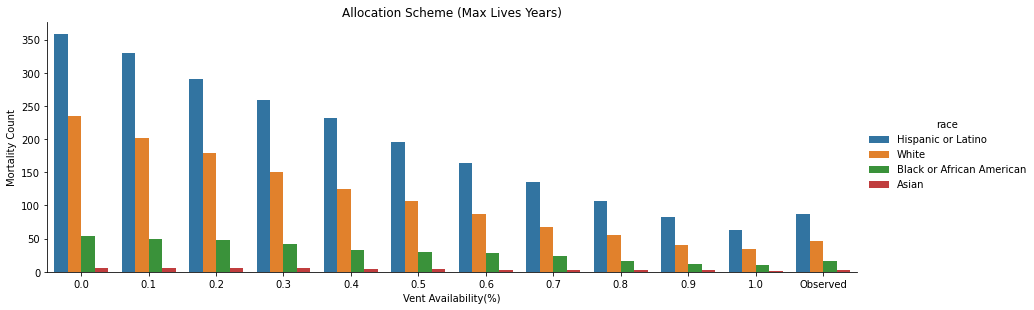

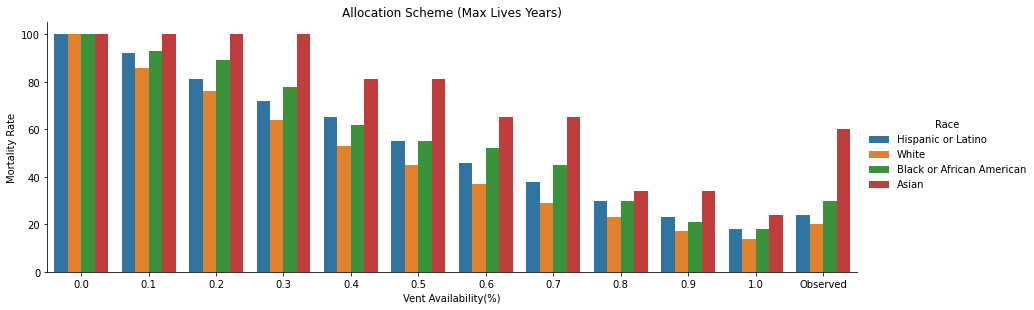

In [124]:
visualize_count_mortality(df_baseline_max_lives_years, 'Max Lives Years')
visualize_percentage_mortality(df_baseline_max_lives_years, 'Max Lives Years')

## Youngest First

In [125]:
ls_df_alloc_level = []          # List of prioritized patients for each scarcity level
ls_df_count_death_race = []

for pct in vent_availability_pct:
    print('------------------------------{}------------------------------'.format(round(pct, 1)))
    allocation = Allocation(df_sample, pct, calibration_sofa_mortality)   # Generate Allocation object
    df_death = allocation.youngest()                                         # Prioritize patients following Maryland CSC
    
    # Count of deaths for each racial group in each scarcity level
    dict_count_death_race = Counter(df_death['race_display'])

    df_death.rename(columns={'race_display': 'race', 'sum': 'count_death'}, inplace=True)
    
    df_death['level'] = round(pct, 1)
    df_death['avg_death'] = statistics.mean(df_death.loc[: ,'count_death'])
    df_death['percentage_death'] = df_death.apply(lambda row: percentage_death(row), axis=1)

    ls_df_count_death_race.append(df_death)

df_youngest = pd.concat(ls_df_count_death_race)
df_youngest['type_allocation'] = 'Youngest'
df_baseline_youngest = pd.concat([death_race_baseline, df_youngest])
df_baseline_youngest[['count_death', 'avg_death', 'percentage_death']] = df_baseline_youngest[['count_death', 'avg_death', 'percentage_death']].round(0).astype(int)

------------------------------0.0------------------------------
0
Check Tie


,race_display,sum
0,Asian,5
1,Black or African American,54
2,Hispanic or Latino,358
3,White,235


,race_display,sum
0,Asian,5
1,Black or African American,54
2,Hispanic or Latino,358
3,White,235


------------------------------0.1------------------------------
65
Check Tie
5


,SOFA,race_display,allocate_vent
647,3,Black or African American,1
359,3,Hispanic or Latino,1
260,3,Hispanic or Latino,1
430,3,White,1
578,3,Hispanic or Latino,1


55


,SOFA,race_display,allocate_vent
42,3,Hispanic or Latino,0
451,3,Hispanic or Latino,0
165,3,Hispanic or Latino,0
330,3,Hispanic or Latino,0
64,3,White,0
524,3,Hispanic or Latino,0
390,3,White,0
38,3,Hispanic or Latino,0
21,3,Hispanic or Latino,0
385,3,Black or African American,0


,SOFA,race_display,count,mortality rate,expected_death
0,0,Black or African American,1,0.000,0.00
1,0,Hispanic or Latino,7,0.000,0.00
2,0,White,11,0.000,0.00
3,1,Hispanic or Latino,8,0.000,0.00
4,1,White,4,0.000,0.00
5,2,Black or African American,2,0.064,0.13
6,2,Hispanic or Latino,2,0.064,0.13
7,2,White,1,0.064,0.06
8,3,Black or African American,1,0.064,0.06
9,3,Hispanic or Latino,3,0.064,0.19


,race_display,sum
0,Black or African American,0.63
1,Hispanic or Latino,4.08
2,White,1.39


,race_display,sum
0,Asian,5
1,Black or African American,48
2,Hispanic or Latino,321
3,White,213


,race_display,sum
0,Asian,5.00
1,Black or African American,48.63
2,Hispanic or Latino,325.08
3,White,214.39


------------------------------0.2------------------------------
130
Check Tie
42


,SOFA,race_display,allocate_vent
360,0,Hispanic or Latino,1
633,0,White,1
548,0,Hispanic or Latino,1
346,0,White,1
148,0,White,1
116,0,White,1
638,0,White,1
158,0,White,1
325,0,Hispanic or Latino,1
590,0,Hispanic or Latino,1


96


,SOFA,race_display,allocate_vent
315,0,Hispanic or Latino,0
299,0,Hispanic or Latino,0
231,0,White,0
479,0,Hispanic or Latino,0
560,0,Hispanic or Latino,0
...,...,...,...
440,0,White,0
539,0,White,0
187,0,White,0
184,0,Hispanic or Latino,0


,SOFA,race_display,count,mortality rate,expected_death
0,0,Black or African American,3,0.000,0.00
1,0,Hispanic or Latino,18,0.000,0.00
2,0,White,21,0.000,0.00
3,1,Hispanic or Latino,10,0.000,0.00
4,1,White,4,0.000,0.00
5,2,Black or African American,3,0.064,0.19
6,2,Hispanic or Latino,6,0.064,0.38
7,2,White,3,0.064,0.19
8,3,Black or African American,1,0.064,0.06
9,3,Hispanic or Latino,8,0.064,0.51


,race_display,sum
0,Asian,0.22
1,Black or African American,1.39
2,Hispanic or Latino,8.64
3,White,4.31


,race_display,sum
0,Asian,4
1,Black or African American,43
2,Hispanic or Latino,282
3,White,193


,race_display,sum
0,Asian,4.22
1,Black or African American,44.39
2,Hispanic or Latino,290.64
3,White,197.31


------------------------------0.3------------------------------
195
Check Tie
18


,SOFA,race_display,allocate_vent
384,1,Hispanic or Latino,1
528,1,Hispanic or Latino,1
567,1,White,1
648,1,White,1
628,1,White,1
127,1,White,1
438,1,Hispanic or Latino,1
408,1,Hispanic or Latino,1
5,1,Hispanic or Latino,1
626,1,Hispanic or Latino,1


56


,SOFA,race_display,allocate_vent
575,1,Black or African American,0
495,1,White,0
602,1,Black or African American,0
219,1,Hispanic or Latino,0
635,1,White,0
543,1,White,0
270,1,White,0
538,1,Hispanic or Latino,0
591,1,Hispanic or Latino,0
381,1,White,0


,SOFA,race_display,count,mortality rate,expected_death
0,0,Black or African American,3,0.000,0.00
1,0,Hispanic or Latino,26,0.000,0.00
2,0,White,31,0.000,0.00
3,1,Black or African American,1,0.000,0.00
4,1,Hispanic or Latino,12,0.000,0.00
5,1,White,5,0.000,0.00
6,2,Black or African American,3,0.064,0.19
7,2,Hispanic or Latino,7,0.064,0.45
8,2,White,4,0.064,0.26
9,3,Black or African American,2,0.064,0.13


,race_display,sum
0,Asian,0.22
1,Black or African American,1.46
2,Hispanic or Latino,15.79
3,White,6.52


,race_display,sum
0,Asian,4
1,Black or African American,41
2,Hispanic or Latino,242
3,White,170


,race_display,sum
0,Asian,4.22
1,Black or African American,42.46
2,Hispanic or Latino,257.79
3,White,176.52


------------------------------0.4------------------------------
260
Check Tie
71


,SOFA,race_display,allocate_vent
360,0,Hispanic or Latino,1
633,0,White,1
548,0,Hispanic or Latino,1
346,0,White,1
148,0,White,1
...,...,...,...
129,0,White,1
216,0,Hispanic or Latino,1
424,0,Hispanic or Latino,1
264,0,Hispanic or Latino,1


67


,SOFA,race_display,allocate_vent
255,0,Hispanic or Latino,0
461,0,Hispanic or Latino,0
558,0,Hispanic or Latino,0
540,0,Hispanic or Latino,0
144,0,Hispanic or Latino,0
...,...,...,...
440,0,White,0
539,0,White,0
187,0,White,0
184,0,Hispanic or Latino,0


,SOFA,race_display,count,mortality rate,expected_death
0,0,Black or African American,4,0.000,0.00
1,0,Hispanic or Latino,33,0.000,0.00
2,0,White,34,0.000,0.00
3,1,Black or African American,3,0.000,0.00
4,1,Hispanic or Latino,13,0.000,0.00
5,1,White,7,0.000,0.00
6,2,Asian,1,0.064,0.06
7,2,Black or African American,3,0.064,0.19
8,2,Hispanic or Latino,7,0.064,0.45
9,2,White,7,0.064,0.45


,race_display,sum
0,Asian,0.28
1,Black or African American,3.36
2,Hispanic or Latino,24.21
3,White,10.98


,race_display,sum
0,Asian,3
1,Black or African American,36
2,Hispanic or Latino,207
3,White,146


,race_display,sum
0,Asian,3.28
1,Black or African American,39.36
2,Hispanic or Latino,231.21
3,White,156.98


------------------------------0.5------------------------------
326
Check Tie
90


,SOFA,race_display,allocate_vent
360,0,Hispanic or Latino,1
633,0,White,1
548,0,Hispanic or Latino,1
346,0,White,1
148,0,White,1
...,...,...,...
474,0,White,1
573,0,Hispanic or Latino,1
386,0,Hispanic or Latino,1
67,0,Hispanic or Latino,1


48


,SOFA,race_display,allocate_vent
513,0,Hispanic or Latino,0
167,0,Hispanic or Latino,0
466,0,Hispanic or Latino,0
239,0,Black or African American,0
615,0,White,0
534,0,Black or African American,0
475,0,White,0
224,0,Hispanic or Latino,0
63,0,Hispanic or Latino,0
533,0,White,0


,SOFA,race_display,count,mortality rate,expected_death
0,0,Black or African American,4,0.000,0.00
1,0,Hispanic or Latino,46,0.000,0.00
2,0,White,40,0.000,0.00
3,1,Black or African American,3,0.000,0.00
4,1,Hispanic or Latino,14,0.000,0.00
5,1,White,9,0.000,0.00
6,2,Asian,1,0.064,0.06
7,2,Black or African American,3,0.064,0.19
8,2,Hispanic or Latino,8,0.064,0.51
9,2,White,7,0.064,0.45


,race_display,sum
0,Asian,0.50
1,Black or African American,4.63
2,Hispanic or Latino,30.32
3,White,15.55


,race_display,sum
0,Asian,2
1,Black or African American,31
2,Hispanic or Latino,169
3,White,124


,race_display,sum
0,Asian,2.50
1,Black or African American,35.63
2,Hispanic or Latino,199.32
3,White,139.55


------------------------------0.6------------------------------
391
Check Tie
35


,SOFA,race_display,allocate_vent
647,3,Black or African American,1
359,3,Hispanic or Latino,1
260,3,Hispanic or Latino,1
430,3,White,1
578,3,Hispanic or Latino,1
42,3,Hispanic or Latino,1
451,3,Hispanic or Latino,1
165,3,Hispanic or Latino,1
330,3,Hispanic or Latino,1
64,3,White,1


25


,SOFA,race_display,allocate_vent
352,3,Black or African American,0
518,3,Hispanic or Latino,0
552,3,White,0
434,3,Hispanic or Latino,0
41,3,Hispanic or Latino,0
406,3,White,0
574,3,White,0
579,3,White,0
244,3,Hispanic or Latino,0
229,3,Black or African American,0


,SOFA,race_display,count,mortality rate,expected_death
0,0,Black or African American,6,0.000,0.00
1,0,Hispanic or Latino,50,0.000,0.00
2,0,White,42,0.000,0.00
3,1,Black or African American,3,0.000,0.00
4,1,Hispanic or Latino,17,0.000,0.00
5,1,White,11,0.000,0.00
6,2,Asian,1,0.064,0.06
7,2,Black or African American,3,0.064,0.19
8,2,Hispanic or Latino,12,0.064,0.77
9,2,White,9,0.064,0.58


,race_display,sum
0,Asian,0.50
1,Black or African American,5.18
2,Hispanic or Latino,39.06
3,White,18.00


,race_display,sum
0,Asian,2
1,Black or African American,27
2,Hispanic or Latino,126
3,White,106


,race_display,sum
0,Asian,2.50
1,Black or African American,32.18
2,Hispanic or Latino,165.06
3,White,124.00


------------------------------0.7------------------------------
456
Check Tie
6


,SOFA,race_display,allocate_vent
253,12,Hispanic or Latino,1
246,12,Hispanic or Latino,1
457,12,Hispanic or Latino,1
444,12,Hispanic or Latino,1
249,12,Hispanic or Latino,1
377,12,Hispanic or Latino,1


2


,SOFA,race_display,allocate_vent
641,12,Hispanic or Latino,0
455,12,Hispanic or Latino,0


,SOFA,race_display,count,mortality rate,expected_death
0,0,Black or African American,6,0.000,0.00
1,0,Hispanic or Latino,60,0.000,0.00
2,0,White,45,0.000,0.00
3,1,Black or African American,4,0.000,0.00
4,1,Hispanic or Latino,21,0.000,0.00
5,1,White,15,0.000,0.00
6,2,Asian,1,0.064,0.06
7,2,Black or African American,4,0.064,0.26
8,2,Hispanic or Latino,14,0.064,0.90
9,2,White,13,0.064,0.83


,race_display,sum
0,Asian,0.50
1,Black or African American,6.16
2,Hispanic or Latino,46.51
3,White,22.14


,race_display,sum
0,Asian,2
1,Black or African American,20
2,Hispanic or Latino,90
3,White,84


,race_display,sum
0,Asian,2.50
1,Black or African American,26.16
2,Hispanic or Latino,136.51
3,White,106.14


------------------------------0.8------------------------------
521
Check Tie
45


,SOFA,race_display,allocate_vent
647,3,Black or African American,1
359,3,Hispanic or Latino,1
260,3,Hispanic or Latino,1
430,3,White,1
578,3,Hispanic or Latino,1
42,3,Hispanic or Latino,1
451,3,Hispanic or Latino,1
165,3,Hispanic or Latino,1
330,3,Hispanic or Latino,1
64,3,White,1


15


,SOFA,race_display,allocate_vent
520,3,Hispanic or Latino,0
512,3,White,0
514,3,Hispanic or Latino,0
561,3,White,0
489,3,Hispanic or Latino,0
351,3,Hispanic or Latino,0
217,3,White,0
453,3,White,0
16,3,White,0
159,3,Hispanic or Latino,0


,SOFA,race_display,count,mortality rate,expected_death
0,0,Black or African American,6,0.000,0.00
1,0,Hispanic or Latino,64,0.000,0.00
2,0,White,52,0.000,0.00
3,1,Black or African American,6,0.000,0.00
4,1,Hispanic or Latino,25,0.000,0.00
5,1,White,22,0.000,0.00
6,2,Asian,1,0.064,0.06
7,2,Black or African American,4,0.064,0.26
8,2,Hispanic or Latino,16,0.064,1.02
9,2,White,13,0.064,0.83


,race_display,sum
0,Asian,1.20
1,Black or African American,7.48
2,Hispanic or Latino,53.03
3,White,24.30


,race_display,sum
0,Black or African American,13
1,Hispanic or Latino,60
2,White,58


,race_display,sum
0,Asian,1.20
1,Black or African American,20.48
2,Hispanic or Latino,113.03
3,White,82.30


------------------------------0.9------------------------------
586
Check Tie
18


,SOFA,race_display,allocate_vent
88,11,Hispanic or Latino,1
572,11,White,1
132,11,Black or African American,1
0,11,Hispanic or Latino,1
340,11,Hispanic or Latino,1
449,11,Hispanic or Latino,1
585,11,Hispanic or Latino,1
106,11,Hispanic or Latino,1
227,11,Hispanic or Latino,1
344,11,Hispanic or Latino,1


1


,SOFA,race_display,allocate_vent
243,11,Hispanic or Latino,0


,SOFA,race_display,count,mortality rate,expected_death
0,0,Black or African American,6,0.000,0.00
1,0,Hispanic or Latino,70,0.000,0.00
2,0,White,57,0.000,0.00
3,1,Black or African American,6,0.000,0.00
4,1,Hispanic or Latino,28,0.000,0.00
5,1,White,25,0.000,0.00
6,2,Asian,1,0.064,0.06
7,2,Black or African American,5,0.064,0.32
8,2,Hispanic or Latino,17,0.064,1.09
9,2,White,16,0.064,1.02


,race_display,sum
0,Asian,1.20
1,Black or African American,8.90
2,Hispanic or Latino,58.99
3,White,29.82


,race_display,sum
0,Black or African American,7
1,Hispanic or Latino,29
2,White,30


,race_display,sum
0,Asian,1.20
1,Black or African American,15.90
2,Hispanic or Latino,87.99
3,White,59.82


------------------------------1.0------------------------------
652
Check Tie


,SOFA,race_display,count,mortality rate,expected_death
0,0,Black or African American,6,0.000,0.00
1,0,Hispanic or Latino,72,0.000,0.00
2,0,White,60,0.000,0.00
3,1,Black or African American,8,0.000,0.00
4,1,Hispanic or Latino,33,0.000,0.00
5,1,White,33,0.000,0.00
6,2,Asian,1,0.064,0.06
7,2,Black or African American,6,0.064,0.38
8,2,Hispanic or Latino,19,0.064,1.22
9,2,White,17,0.064,1.09


,race_display,sum
0,Asian,1.20
1,Black or African American,9.90
2,Hispanic or Latino,63.21
3,White,33.56


,race_display,sum
0,Asian,1.20
1,Black or African American,9.90
2,Hispanic or Latino,63.21
3,White,33.56


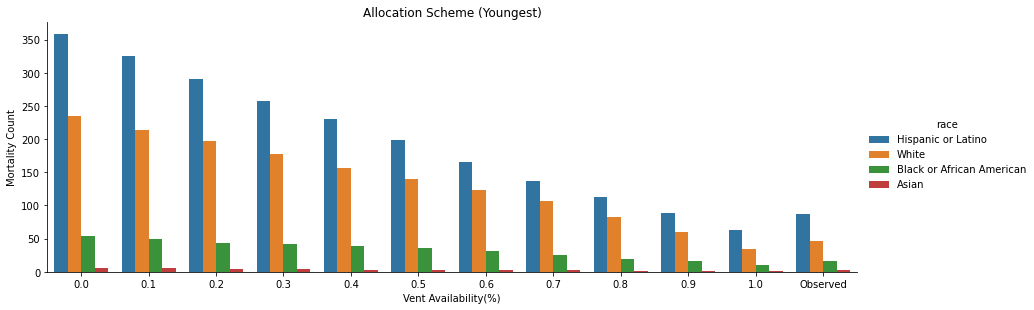

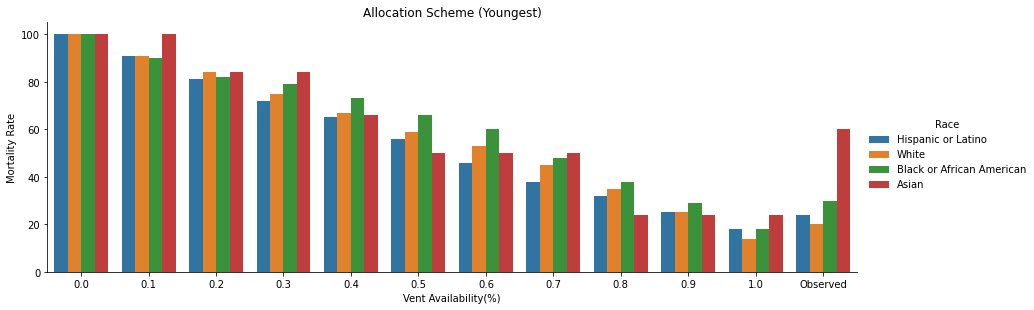

In [126]:
visualize_count_mortality(df_baseline_youngest, 'Youngest')
visualize_percentage_mortality(df_baseline_youngest, 'Youngest')

## Sickest First

In [127]:
ls_df_alloc_level = []          # List of prioritized patients for each scarcity level
ls_df_count_death_race = []

for pct in vent_availability_pct:
    print('------------------------------{}------------------------------'.format(round(pct, 1)))
    allocation = Allocation(df_sample, pct, calibration_sofa_mortality)   # Generate Allocation object
    df_death = allocation.sickest()                                         # Prioritize patients following Maryland CSC
    
    # Count of deaths for each racial group in each scarcity level
    dict_count_death_race = Counter(df_death['race_display'])

    df_death.rename(columns={'race_display': 'race', 'sum': 'count_death'}, inplace=True)
    
    df_death['level'] = round(pct, 1)
    df_death['avg_death'] = statistics.mean(df_death.loc[: ,'count_death'])
    df_death['percentage_death'] = df_death.apply(lambda row: percentage_death(row), axis=1)

    ls_df_count_death_race.append(df_death)

df_sickest = pd.concat(ls_df_count_death_race)
df_sickest['type_allocation'] = 'Sickest'
df_baseline_sickest = pd.concat([death_race_baseline, df_sickest])
df_baseline_sickest[['count_death', 'avg_death', 'percentage_death']] = df_baseline_sickest[['count_death', 'avg_death', 'percentage_death']].round(0).astype(int)


------------------------------0.0------------------------------
0
Check Tie


,race_display,sum
0,Asian,5
1,Black or African American,54
2,Hispanic or Latino,358
3,White,235


,race_display,sum
0,Asian,5
1,Black or African American,54
2,Hispanic or Latino,358
3,White,235


------------------------------0.1------------------------------
65
Check Tie
16


,SOFA,race_display,allocate_vent
49,9,White,1
50,9,Hispanic or Latino,1
51,9,Hispanic or Latino,1
52,9,Hispanic or Latino,1
53,9,White,1
54,9,Hispanic or Latino,1
55,9,White,1
56,9,Hispanic or Latino,1
57,9,White,1
58,9,White,1


19


,SOFA,race_display,allocate_vent
65,9,White,0
66,9,Black or African American,0
67,9,Hispanic or Latino,0
68,9,White,0
69,9,White,0
70,9,Hispanic or Latino,0
71,9,Hispanic or Latino,0
72,9,Hispanic or Latino,0
73,9,White,0
74,9,Hispanic or Latino,0


,SOFA,race_display,count,mortality rate,expected_death
0,9,Hispanic or Latino,9,0.333,3.00
1,9,White,7,0.333,2.33
2,10,Asian,1,0.500,0.50
3,10,Black or African American,1,0.500,0.50
4,10,Hispanic or Latino,7,0.500,3.50
5,10,White,1,0.500,0.50
6,11,Black or African American,2,0.500,1.00
7,11,Hispanic or Latino,14,0.500,7.00
8,11,White,3,0.500,1.50
9,12,Hispanic or Latino,8,0.952,7.62


,race_display,sum
0,Asian,0.50
1,Black or African American,3.40
2,Hispanic or Latino,23.02
3,White,11.94


,race_display,sum
0,Asian,4
1,Black or African American,49
2,Hispanic or Latino,318
3,White,216


,race_display,sum
0,Asian,4.50
1,Black or African American,52.40
2,Hispanic or Latino,341.02
3,White,227.94


------------------------------0.2------------------------------
130
Check Tie
16


,SOFA,race_display,allocate_vent
114,7,Hispanic or Latino,1
115,7,Hispanic or Latino,1
116,7,Hispanic or Latino,1
117,7,White,1
118,7,Black or African American,1
119,7,Hispanic or Latino,1
120,7,Black or African American,1
121,7,Hispanic or Latino,1
122,7,White,1
123,7,Hispanic or Latino,1


16


,SOFA,race_display,allocate_vent
130,7,Hispanic or Latino,0
131,7,White,0
132,7,Hispanic or Latino,0
133,7,Hispanic or Latino,0
134,7,Hispanic or Latino,0
135,7,White,0
136,7,White,0
137,7,Hispanic or Latino,0
138,7,Asian,0
139,7,White,0


,SOFA,race_display,count,mortality rate,expected_death
0,7,Black or African American,2,0.215,0.43
1,7,Hispanic or Latino,9,0.215,1.94
2,7,White,5,0.215,1.08
3,8,Black or African American,4,0.333,1.33
4,8,Hispanic or Latino,20,0.333,6.66
5,8,White,6,0.333,2.00
6,9,Black or African American,1,0.333,0.33
7,9,Hispanic or Latino,21,0.333,6.99
8,9,White,13,0.333,4.33
9,10,Asian,1,0.500,0.50


,race_display,sum
0,Asian,0.50
1,Black or African American,5.49
2,Hispanic or Latino,35.61
3,White,17.02


,race_display,sum
0,Asian,4
1,Black or African American,42
2,Hispanic or Latino,277
3,White,199


,race_display,sum
0,Asian,4.50
1,Black or African American,47.49
2,Hispanic or Latino,312.61
3,White,216.02


------------------------------0.3------------------------------
195
Check Tie
49


,SOFA,race_display,allocate_vent
146,6,Hispanic or Latino,1
147,6,White,1
148,6,Hispanic or Latino,1
149,6,Black or African American,1
150,6,White,1
151,6,Hispanic or Latino,1
152,6,Hispanic or Latino,1
153,6,Hispanic or Latino,1
154,6,Black or African American,1
155,6,White,1


0


,SOFA,race_display,allocate_vent


,SOFA,race_display,count,mortality rate,expected_death
0,6,Asian,1,0.215,0.22
1,6,Black or African American,9,0.215,1.94
2,6,Hispanic or Latino,27,0.215,5.80
3,6,White,12,0.215,2.58
4,7,Asian,1,0.215,0.22
5,7,Black or African American,3,0.215,0.64
6,7,Hispanic or Latino,17,0.215,3.66
7,7,White,11,0.215,2.37
8,8,Black or African American,4,0.333,1.33
9,8,Hispanic or Latino,20,0.333,6.66


,race_display,sum
0,Asian,0.94
1,Black or African American,7.64
2,Hispanic or Latino,43.13
3,White,20.89


,race_display,sum
0,Asian,2
1,Black or African American,32
2,Hispanic or Latino,242
3,White,181


,race_display,sum
0,Asian,2.94
1,Black or African American,39.64
2,Hispanic or Latino,285.13
3,White,201.89


------------------------------0.4------------------------------
260
Check Tie
8


,SOFA,race_display,allocate_vent
252,4,White,1
253,4,White,1
254,4,Hispanic or Latino,1
255,4,Hispanic or Latino,1
256,4,Hispanic or Latino,1
257,4,White,1
258,4,Hispanic or Latino,1
259,4,Hispanic or Latino,1


77


,SOFA,race_display,allocate_vent
260,4,White,0
261,4,Hispanic or Latino,0
262,4,Hispanic or Latino,0
263,4,White,0
264,4,Hispanic or Latino,0
...,...,...,...
332,4,Hispanic or Latino,0
333,4,White,0
334,4,White,0
335,4,White,0


,SOFA,race_display,count,mortality rate,expected_death
0,4,Hispanic or Latino,5,0.202,1.01
1,4,White,3,0.202,0.61
2,5,Black or African American,5,0.202,1.01
3,5,Hispanic or Latino,31,0.202,6.26
4,5,White,21,0.202,4.24
5,6,Asian,1,0.215,0.22
6,6,Black or African American,9,0.215,1.94
7,6,Hispanic or Latino,27,0.215,5.80
8,6,White,12,0.215,2.58
9,7,Asian,1,0.215,0.22


,race_display,sum
0,Asian,0.94
1,Black or African American,8.65
2,Hispanic or Latino,50.40
3,White,25.74


,race_display,sum
0,Asian,2
1,Black or African American,27
2,Hispanic or Latino,206
3,White,157


,race_display,sum
0,Asian,2.94
1,Black or African American,35.65
2,Hispanic or Latino,256.40
3,White,182.74


------------------------------0.5------------------------------
326
Check Tie
74


,SOFA,race_display,allocate_vent
252,4,White,1
253,4,White,1
254,4,Hispanic or Latino,1
255,4,Hispanic or Latino,1
256,4,Hispanic or Latino,1
...,...,...,...
321,4,White,1
322,4,Hispanic or Latino,1
323,4,Black or African American,1
324,4,White,1


11


,SOFA,race_display,allocate_vent
326,4,White,0
327,4,Hispanic or Latino,0
328,4,Hispanic or Latino,0
329,4,Hispanic or Latino,0
330,4,White,0
331,4,Hispanic or Latino,0
332,4,Hispanic or Latino,0
333,4,White,0
334,4,White,0
335,4,White,0


,SOFA,race_display,count,mortality rate,expected_death
0,4,Asian,1,0.202,0.20
1,4,Black or African American,3,0.202,0.61
2,4,Hispanic or Latino,45,0.202,9.09
3,4,White,25,0.202,5.05
4,5,Black or African American,5,0.202,1.01
5,5,Hispanic or Latino,31,0.202,6.26
6,5,White,21,0.202,4.24
7,6,Asian,1,0.215,0.22
8,6,Black or African American,9,0.215,1.94
9,6,Hispanic or Latino,27,0.215,5.80


,race_display,sum
0,Asian,1.14
1,Black or African American,9.26
2,Hispanic or Latino,58.48
3,White,30.18


,race_display,sum
0,Asian,1
1,Black or African American,24
2,Hispanic or Latino,166
3,White,135


,race_display,sum
0,Asian,2.14
1,Black or African American,33.26
2,Hispanic or Latino,224.48
3,White,165.18


------------------------------0.6------------------------------
391
Check Tie
54


,SOFA,race_display,allocate_vent
337,3,Hispanic or Latino,1
338,3,White,1
339,3,Hispanic or Latino,1
340,3,White,1
341,3,Hispanic or Latino,1
342,3,Hispanic or Latino,1
343,3,Hispanic or Latino,1
344,3,Hispanic or Latino,1
345,3,Hispanic or Latino,1
346,3,White,1


6


,SOFA,race_display,allocate_vent
391,3,White,0
392,3,White,0
393,3,Hispanic or Latino,0
394,3,Hispanic or Latino,0
395,3,Hispanic or Latino,0
396,3,Hispanic or Latino,0


,SOFA,race_display,count,mortality rate,expected_death
0,3,Black or African American,4,0.064,0.26
1,3,Hispanic or Latino,32,0.064,2.05
2,3,White,18,0.064,1.15
3,4,Asian,1,0.202,0.20
4,4,Black or African American,3,0.202,0.61
5,4,Hispanic or Latino,51,0.202,10.30
6,4,White,30,0.202,6.06
7,5,Black or African American,5,0.202,1.01
8,5,Hispanic or Latino,31,0.202,6.26
9,5,White,21,0.202,4.24


,race_display,sum
0,Asian,1.14
1,Black or African American,9.52
2,Hispanic or Latino,61.74
3,White,32.34


,race_display,sum
0,Asian,1
1,Black or African American,20
2,Hispanic or Latino,128
3,White,112


,race_display,sum
0,Asian,2.14
1,Black or African American,29.52
2,Hispanic or Latino,189.74
3,White,144.34


------------------------------0.7------------------------------
456
Check Tie
16


,SOFA,race_display,allocate_vent
440,1,White,1
441,1,White,1
442,1,Black or African American,1
443,1,White,1
444,1,Hispanic or Latino,1
445,1,Black or African American,1
446,1,White,1
447,1,White,1
448,1,White,1
449,1,White,1


58


,SOFA,race_display,allocate_vent
456,1,Black or African American,0
457,1,Hispanic or Latino,0
458,1,Hispanic or Latino,0
459,1,White,0
460,1,White,0
461,1,Hispanic or Latino,0
462,1,White,0
463,1,White,0
464,1,Black or African American,0
465,1,White,0


,SOFA,race_display,count,mortality rate,expected_death
0,1,Black or African American,2,0.000,0.00
1,1,Hispanic or Latino,3,0.000,0.00
2,1,White,11,0.000,0.00
3,2,Asian,1,0.064,0.06
4,2,Black or African American,6,0.064,0.38
5,2,Hispanic or Latino,19,0.064,1.22
6,2,White,17,0.064,1.09
7,3,Black or African American,4,0.064,0.26
8,3,Hispanic or Latino,36,0.064,2.30
9,3,White,20,0.064,1.28


,race_display,sum
0,Asian,1.20
1,Black or African American,9.90
2,Hispanic or Latino,63.21
3,White,33.56


,race_display,sum
0,Black or African American,12
1,Hispanic or Latino,102
2,White,82


,race_display,sum
0,Asian,1.20
1,Black or African American,21.90
2,Hispanic or Latino,165.21
3,White,115.56


------------------------------0.8------------------------------
521
Check Tie
7


,SOFA,race_display,allocate_vent
514,0,White,1
515,0,White,1
516,0,White,1
517,0,Black or African American,1
518,0,Hispanic or Latino,1
519,0,Hispanic or Latino,1
520,0,Hispanic or Latino,1


131


,SOFA,race_display,allocate_vent
521,0,Hispanic or Latino,0
522,0,White,0
523,0,White,0
524,0,White,0
525,0,Hispanic or Latino,0
...,...,...,...
647,0,White,0
648,0,White,0
649,0,Hispanic or Latino,0
650,0,Hispanic or Latino,0


,SOFA,race_display,count,mortality rate,expected_death
0,0,Black or African American,1,0.000,0.00
1,0,Hispanic or Latino,3,0.000,0.00
2,0,White,3,0.000,0.00
3,1,Black or African American,8,0.000,0.00
4,1,Hispanic or Latino,33,0.000,0.00
5,1,White,33,0.000,0.00
6,2,Asian,1,0.064,0.06
7,2,Black or African American,6,0.064,0.38
8,2,Hispanic or Latino,19,0.064,1.22
9,2,White,17,0.064,1.09


,race_display,sum
0,Asian,1.20
1,Black or African American,9.90
2,Hispanic or Latino,63.21
3,White,33.56


,race_display,sum
0,Black or African American,5
1,Hispanic or Latino,69
2,White,57


,race_display,sum
0,Asian,1.20
1,Black or African American,14.90
2,Hispanic or Latino,132.21
3,White,90.56


------------------------------0.9------------------------------
586
Check Tie
72


,SOFA,race_display,allocate_vent
514,0,White,1
515,0,White,1
516,0,White,1
517,0,Black or African American,1
518,0,Hispanic or Latino,1
...,...,...,...
581,0,White,1
582,0,Hispanic or Latino,1
583,0,White,1
584,0,Hispanic or Latino,1


66


,SOFA,race_display,allocate_vent
586,0,Hispanic or Latino,0
587,0,Hispanic or Latino,0
588,0,White,0
589,0,White,0
590,0,White,0
...,...,...,...
647,0,White,0
648,0,White,0
649,0,Hispanic or Latino,0
650,0,Hispanic or Latino,0


,SOFA,race_display,count,mortality rate,expected_death
0,0,Black or African American,1,0.000,0.00
1,0,Hispanic or Latino,40,0.000,0.00
2,0,White,31,0.000,0.00
3,1,Black or African American,8,0.000,0.00
4,1,Hispanic or Latino,33,0.000,0.00
5,1,White,33,0.000,0.00
6,2,Asian,1,0.064,0.06
7,2,Black or African American,6,0.064,0.38
8,2,Hispanic or Latino,19,0.064,1.22
9,2,White,17,0.064,1.09


,race_display,sum
0,Asian,1.20
1,Black or African American,9.90
2,Hispanic or Latino,63.21
3,White,33.56


,race_display,sum
0,Black or African American,5
1,Hispanic or Latino,32
2,White,29


,race_display,sum
0,Asian,1.20
1,Black or African American,14.90
2,Hispanic or Latino,95.21
3,White,62.56


------------------------------1.0------------------------------
652
Check Tie


,SOFA,race_display,count,mortality rate,expected_death
0,0,Black or African American,6,0.000,0.00
1,0,Hispanic or Latino,72,0.000,0.00
2,0,White,60,0.000,0.00
3,1,Black or African American,8,0.000,0.00
4,1,Hispanic or Latino,33,0.000,0.00
5,1,White,33,0.000,0.00
6,2,Asian,1,0.064,0.06
7,2,Black or African American,6,0.064,0.38
8,2,Hispanic or Latino,19,0.064,1.22
9,2,White,17,0.064,1.09


,race_display,sum
0,Asian,1.20
1,Black or African American,9.90
2,Hispanic or Latino,63.21
3,White,33.56


,race_display,sum
0,Asian,1.20
1,Black or African American,9.90
2,Hispanic or Latino,63.21
3,White,33.56


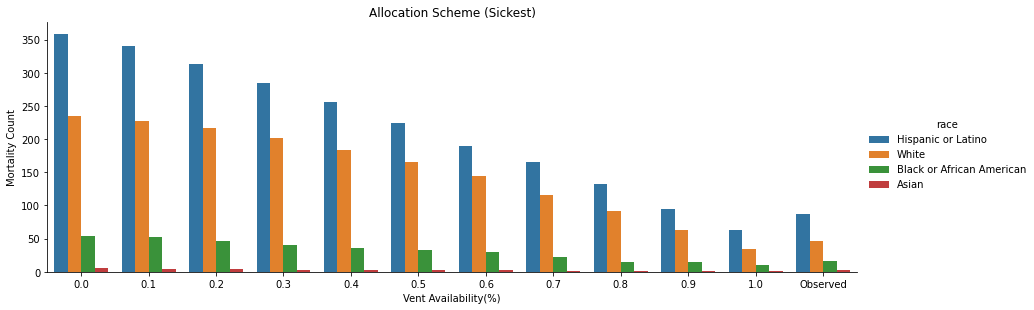

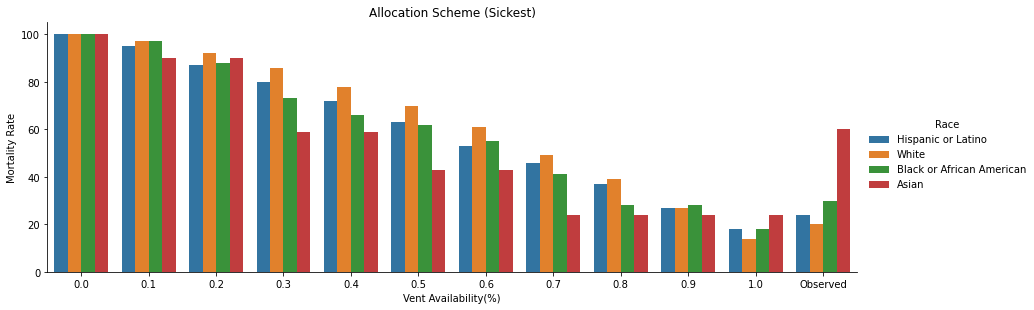

In [128]:
visualize_count_mortality(df_baseline_sickest, 'Sickest')
visualize_percentage_mortality(df_baseline_sickest, 'Sickest')

# Allocate ventilators (Simulation)

## New York

In [129]:
ls_df_count_death_race_level = [] # Store dataframes for all scarcity levels
#ls_df_count_death_race_level.append(death_race_baseline)

for pct in vent_availability_pct:
    print('-------------------------{}-------------------------'.format(pct))
    ls_df_alloc_iter = []               # Store allocated dataframes within iteration
    ls_df_count_death_race_iter = []    # Store dataframes of racial death counts within iteration
    ls_dict_count_death_race_iter = []  # Store dictionary of racial death counts within iteration

    for _ in range(iter_simulation):    # Iterate 1000 times per scarcity level
        # Allocate ventilators to patients
        allocation = Allocation(df_sample, pct, calibration_sofa_mortality)
        df_death = allocation.new_york()
        
        # Convert dictionary to dataframe
        dict_count_death_race = Counter(df_death['race_display'])

        ls_df_count_death_race_iter.append(df_death)
    
    df_count_death_race_level = pd.concat(ls_df_count_death_race_iter)
    df_count_death_race_level.rename(columns={'race_display': 'race', 'sum': 'count_death'}, inplace=True)
    df_count_death_race_level = df_count_death_race_level.groupby('race').agg(['mean']).round(0).astype(int)
    df_count_death_race_level = df_count_death_race_level.reset_index(level=['race'], col_level=1)
    df_count_death_race_level.columns = df_count_death_race_level.columns.droplevel(0)
    df_count_death_race_level.rename(columns={'mean': 'count_death'}, inplace=True)

    df_count_death_race_level['level'] = round(pct, 1)
    df_count_death_race_level['type_allocation'] = 'New York'
    df_count_death_race_level['avg_death'] = statistics.mean(df_count_death_race_level.loc[: ,'count_death'])
    df_count_death_race_level['percentage_death'] = df_count_death_race_level.apply(lambda row: percentage_death(row), axis=1)
    
    ls_df_count_death_race_level.append(df_count_death_race_level)

df_new_york = pd.concat(ls_df_count_death_race_level)
df_baseline_new_york = pd.concat([death_race_baseline, df_new_york])
df_baseline_new_york[['count_death', 'avg_death', 'percentage_death']] = df_baseline_new_york[['count_death', 'avg_death', 'percentage_death']].round(0).astype(int)

-------------------------0.0-------------------------
-------------------------0.1-------------------------
-------------------------0.2-------------------------
-------------------------0.30000000000000004-------------------------
-------------------------0.4-------------------------
-------------------------0.5-------------------------
-------------------------0.6000000000000001-------------------------
-------------------------0.7000000000000001-------------------------
-------------------------0.8-------------------------
-------------------------0.9-------------------------
-------------------------1.0-------------------------


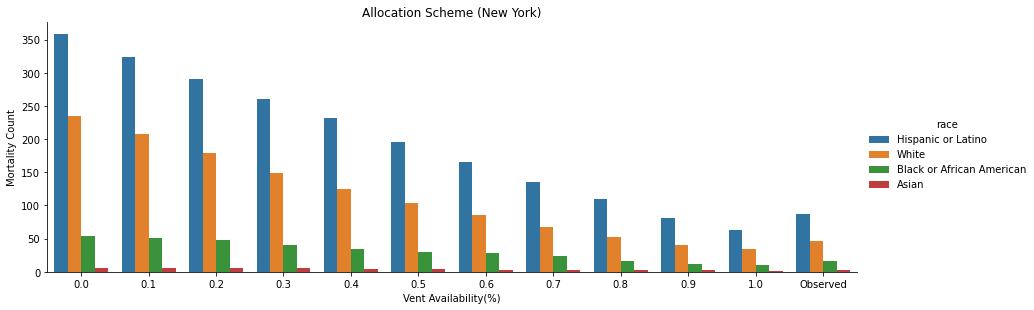

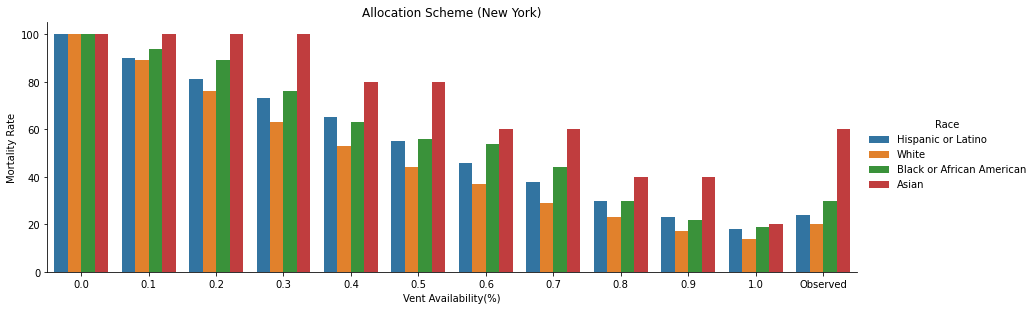

In [130]:
visualize_count_mortality(df_baseline_new_york, 'New York')
visualize_percentage_mortality(df_baseline_new_york, 'New York')

## Lottery

In [131]:
ls_df_count_death_race_level = [] # Store dataframes for all scarcity levels
#ls_df_count_death_race_level.append(death_race_baseline)

for pct in vent_availability_pct:
    print('-------------------------{}-------------------------'.format(pct))
    ls_df_alloc_iter = []               # Store allocated dataframes within iteration
    ls_df_count_death_race_iter = []    # Store dataframes of racial death counts within iteration
    ls_dict_count_death_race_iter = []  # Store dictionary of racial death counts within iteration

    for _ in range(iter_simulation):    # Iterate 1000 times per scarcity level

        allocation = Allocation(df_sample, pct, calibration_sofa_mortality)
        df_death = allocation.lottery()
        
        # Convert dictionary to dataframe
        dict_count_death_race = Counter(df_death['race_display'])
        
        ls_df_count_death_race_iter.append(df_death)
    
    df_count_death_race_level = pd.concat(ls_df_count_death_race_iter)
    df_count_death_race_level.rename(columns={'race_display': 'race', 'sum': 'count_death'}, inplace=True)
    df_count_death_race_level = df_count_death_race_level.groupby('race').agg(['mean']).round(0).astype(int)
    df_count_death_race_level = df_count_death_race_level.reset_index(level=['race'], col_level=1)
    df_count_death_race_level.columns = df_count_death_race_level.columns.droplevel(0)
    df_count_death_race_level.rename(columns={'mean': 'count_death'}, inplace=True)
    
    df_count_death_race_level['level'] = round(pct, 1)
    df_count_death_race_level['type_allocation'] = 'Lottery'
    df_count_death_race_level['avg_death'] = statistics.mean(df_count_death_race_level.loc[: ,'count_death'])
    df_count_death_race_level['percentage_death'] = df_count_death_race_level.apply(lambda row: percentage_death(row), axis=1)
    
    ls_df_count_death_race_level.append(df_count_death_race_level)

df_lottery = pd.concat(ls_df_count_death_race_level)
df_baseline_lottery = pd.concat([death_race_baseline, df_lottery])
df_baseline_lottery[['count_death', 'avg_death', 'percentage_death']] = df_baseline_lottery[['count_death', 'avg_death', 'percentage_death']].round(0).astype(int)

-------------------------0.0-------------------------
-------------------------0.1-------------------------
-------------------------0.2-------------------------
-------------------------0.30000000000000004-------------------------
-------------------------0.4-------------------------
-------------------------0.5-------------------------
-------------------------0.6000000000000001-------------------------
-------------------------0.7000000000000001-------------------------
-------------------------0.8-------------------------
-------------------------0.9-------------------------
-------------------------1.0-------------------------


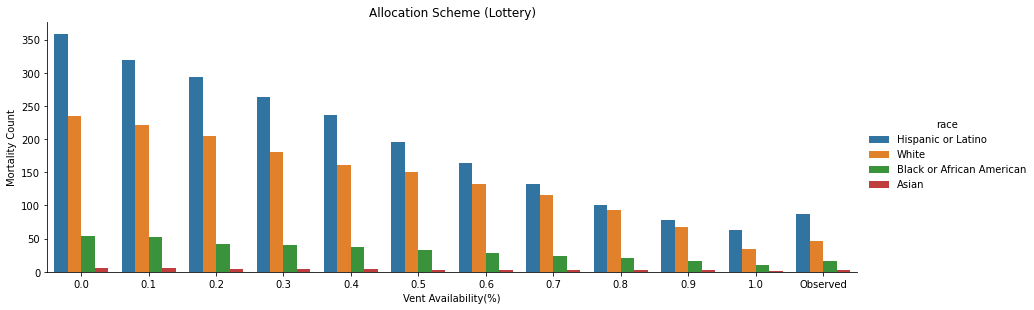

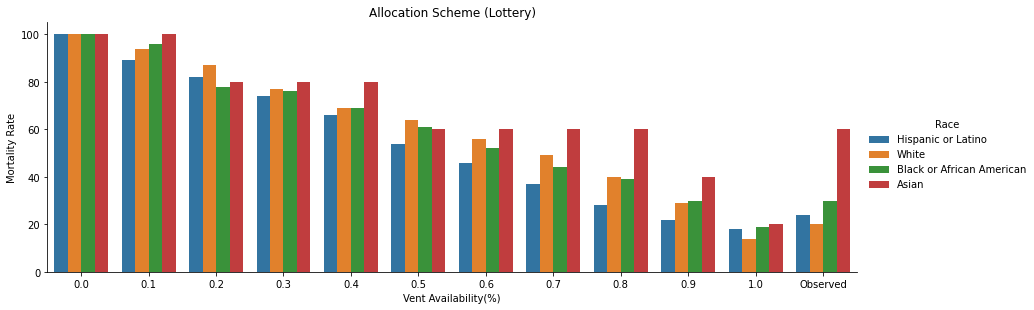

In [132]:
visualize_count_mortality(df_baseline_lottery, 'Lottery')
visualize_percentage_mortality(df_baseline_lottery, 'Lottery')

# Total

In [133]:
df_csc_all = pd.concat([
    df_new_york[['type_allocation', 'level', 'avg_death']], 
    df_maryland[['type_allocation', 'level', 'avg_death']], 
    df_max_lives_years[['type_allocation', 'level', 'avg_death']], 
    df_youngest[['type_allocation', 'level', 'avg_death']], 
    df_sickest[['type_allocation', 'level', 'avg_death']], 
    df_lottery[['type_allocation', 'level', 'avg_death']], 
])

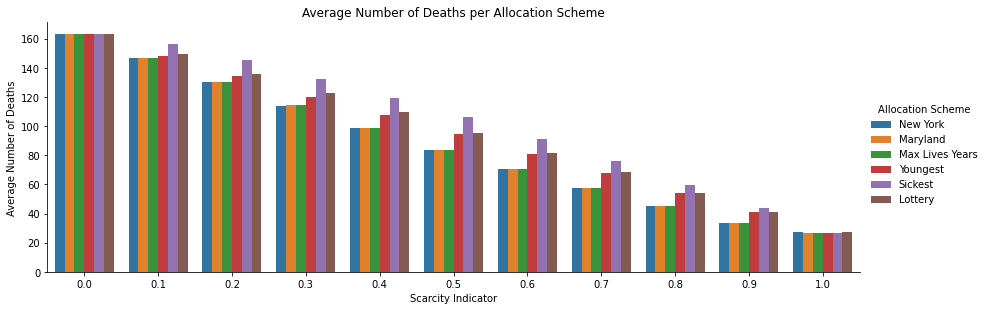

In [134]:
#%matplotlib qt
sns_plot = sns.catplot(x='level', y='avg_death', hue='type_allocation', data=df_csc_all[df_csc_all['level']!=2.0], kind='bar', legend_out=True, height=4, aspect=3)
plt.title('Average Number of Deaths per Allocation Scheme')
sns_plot._legend.set_title('Allocation Scheme')
plt.xlabel('Scarcity Indicator')
plt.ylabel('Average Number of Deaths')
sns_plot.savefig("figures_new/total_average_death.png")

# Statistics

In [206]:
import scipy.stats as stats
from scipy.stats import f_oneway
from statsmodels.sandbox.stats.multicomp import MultiComparison
from scipy.stats import chi2_contingency
import urllib
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
%matplotlib inline

## Chi-squared

In [210]:
df_maryland.loc[df_maryland['level']==0.3]

,race,count_death,level,avg_death,percentage_death,type_allocation
0,Asian,3.0,0.3,75.5,60.000000,Maryland
1,Black or African American,27.0,0.3,75.5,50.000000,Maryland
2,Hispanic or Latino,174.0,0.3,75.5,48.603352,Maryland
3,White,98.0,0.3,75.5,41.702128,Maryland


In [209]:
chi2_contingency(df_maryland.loc[df_maryland['level']==0.3, ['percentage_death']])

(0.0,
 1.0,
 0,
 array([[60.        ],
        [50.        ],
        [48.60335196],
        [41.70212766]]))

## ANOVA

# Social Vulnerable Index

In [211]:
print(df_svi_tx_travis.shape)
df_svi_tx_travis

(362, 149)


,ST,STATE_x,ST_ABBR,STCNTY,COUNTY_x,FIPS,LOCATION,AREA_SQMI,E_TOTPOP,M_TOTPOP,E_HU,M_HU,E_HH,M_HH,E_POV,M_POV,E_UNEMP,M_UNEMP,E_PCI,M_PCI,E_NOHSDP,M_NOHSDP,E_AGE65,M_AGE65,E_AGE17,M_AGE17,E_DISABL,M_DISABL,E_SNGPNT,M_SNGPNT,E_MINRTY,M_MINRTY,E_LIMENG,M_LIMENG,E_MUNIT,M_MUNIT,E_MOBILE,M_MOBILE,E_CROWD,M_CROWD,E_NOVEH,M_NOVEH,E_GROUPQ,M_GROUPQ,EP_POV,MP_POV,EP_UNEMP,MP_UNEMP,EP_PCI,MP_PCI,EP_NOHSDP,MP_NOHSDP,EP_AGE65,MP_AGE65,EP_AGE17,MP_AGE17,EP_DISABL,MP_DISABL,EP_SNGPNT,MP_SNGPNT,EP_MINRTY,MP_MINRTY,EP_LIMENG,MP_LIMENG,EP_MUNIT,MP_MUNIT,EP_MOBILE,MP_MOBILE,EP_CROWD,MP_CROWD,EP_NOVEH,MP_NOVEH,EP_GROUPQ,MP_GROUPQ,EPL_POV,EPL_UNEMP,EPL_PCI,EPL_NOHSDP,SPL_THEME1,RPL_THEME1,EPL_AGE65,EPL_AGE17,EPL_DISABL,EPL_SNGPNT,SPL_THEME2,RPL_THEME2,EPL_MINRTY,EPL_LIMENG,SPL_THEME3,RPL_THEME3,EPL_MUNIT,EPL_MOBILE,EPL_CROWD,EPL_NOVEH,EPL_GROUPQ,SPL_THEME4,RPL_THEME4,SPL_THEMES,RPL_THEMES,F_POV,F_UNEMP,F_PCI,F_NOHSDP,F_THEME1,F_AGE65,F_AGE17,F_DISABL,F_SNGPNT,F_THEME2,F_MINRTY,F_LIMENG,F_THEME3,F_MUNIT,F_MOBILE,F_CROWD,F_NOVEH,F_GROUPQ,F_THEME4,F_TOTAL,E_UNINSUR,M_UNINSUR,EP_UNINSUR,MP_UNINSUR,E_DAYPOP,ZCTA5,STATE_y,COUNTY_y,TRACT,GEOID,POPPT,HUPT,AREAPT,AREALANDPT,ZPOP,ZHU,ZAREA,ZAREALAND,TRPOP,TRHU,TRAREA,TRAREALAND,ZPOPPCT,ZHUPCT,ZAREAPCT,ZAREALANDPCT,TRPOPPCT,TRHUPCT,TRAREAPCT,TRAREALANDPCT
0,48,TEXAS,TX,48453,Travis,48453000101,"Census Tract 1.01, Travis County, Texas",1.206569,4652,418,2273,68,2133,107,294,128,79,61,67846,7009,43,42,783,131,855,120,378,113,139,85,802,505,0,52,729,113,11,18,8,18,140,61,17,39,6.4,2.8,2.8,2.2,67846.0,7009.0,1.3,1.2,16.8,3.3,18.4,2.0,8.2,2.5,6.5,4.0,17.2,10.8,0.0,1.2,32.1,4.9,0.5,0.8,0.4,0.9,6.6,2.8,0.4,0.8,0.2030,0.1882,0.0389,0.0333,0.4634,0.0512,0.7517,0.1391,0.2348,0.2980,1.4236,0.1716,0.0735,0.0000,0.0735,0.0208,0.8535,0.3952,0.1008,0.6693,0.6645,2.6833,0.6702,4.6438,0.1653,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,117,74,2.5,1.6,5986,78703,48,453,101,48453000101,0,0,46469,46469,19690,10425,15173565,14451214,3611,2076,3126682,3126682,0.00,0.00,0.31,0.32,0.00,0.00,1.49,1.49
1,48,TEXAS,TX,48453,Travis,48453000101,"Census Tract 1.01, Travis County, Texas",1.206569,4652,418,2273,68,2133,107,294,128,79,61,67846,7009,43,42,783,131,855,120,378,113,139,85,802,505,0,52,729,113,11,18,8,18,140,61,17,39,6.4,2.8,2.8,2.2,67846.0,7009.0,1.3,1.2,16.8,3.3,18.4,2.0,8.2,2.5,6.5,4.0,17.2,10.8,0.0,1.2,32.1,4.9,0.5,0.8,0.4,0.9,6.6,2.8,0.4,0.8,0.2030,0.1882,0.0389,0.0333,0.4634,0.0512,0.7517,0.1391,0.2348,0.2980,1.4236,0.1716,0.0735,0.0000,0.0735,0.0208,0.8535,0.3952,0.1008,0.6693,0.6645,2.6833,0.6702,4.6438,0.1653,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,117,74,2.5,1.6,5986,78731,48,453,101,48453000101,3611,2076,3080213,3080213,24614,12984,22804475,22253088,3611,2076,3126682,3126682,14.67,15.99,13.51,13.84,100.00,100.00,98.51,98.51
2,48,TEXAS,TX,48453,Travis,48453000102,"Census Tract 1.02, Travis County, Texas",2.125888,2604,170,1193,32,1110,71,45,32,22,22,112935,17709,21,26,704,133,556,75,290,104,18,19,268,248,3,48,17,23,0,13,0,18,8,13,20,9,1.7,1.2,1.7,1.7,112935.0,17709.0,1.1,1.3,27.0,4.9,21.4,2.5,11.1,4.1,1.6,1.7,10.3,9.5,0.1,2.0,1.4,2.0,0.0,3.3,0.0,1.7,0.7,1.2,0.8,0.3,0.0245,0.0724,0.0057,0.0251,0.1277,0.0027,0.9734,0.2477,0.4503,0.0333,1.7047,0.3019,0.0201,0.0386,0.0587,0.0151,0.3347,0.0000,0.0000,0.0915,0.7288,1.1550,0.1105,3.0461,0.0344,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,52,51,2.0,2.0,2850,78703,48,453,102,48453000102,28,19,1608974,1608974,19690,10425,15173565,14451214,2552,1153,5637536,5481065,0.14,0.18,10.60,11.13,1.10,1.65,28.54,29.36
3,48,TEXAS,TX,48453,Travis,48453000102,"Census Tract 1.02, Travis County, Texas",2.125888,2604,170,1193,32,1110,71,45,32,22,22,112935,17709,21,26,704,133,556,75,290,104,18,19,268,248,3,48,17,23,0,13,0,18,8,13,20,9,1.7,1.2,1.7,1.7,112935.0,17709.0,1.1,1.3,27.0,4.9,21.4,2.5,11.1,4.1,1.6,1.7,10.3,9.5,0.1,2.0,1.4,2.0,0.0,3.3,0.0,1.7,0.7,1.2,0.8,0.3,0.0245,0.0724,0.0057,0.0251,0.1277,0.0027,0.9734,0.2477,0.4503,0.0333,1.7047,0.3019,0.0201,0.0386,0.0587,0.0151,0.3347,0.0000,0.0000,0.0915,0.

In [357]:
print(df_sample.shape)
df_sample.head()

(652, 16)


,deid_fin_encounter,age_at_admit,gender,race_display,insured_uninsured,zip_code,median_income,poverty_rate,icu_hours_summed,vent_hours_summed,SOFA,has_comorbidity,count_comorbidity,life_years,discharge_disposition_display,deceased_dt_tm
0,27818,44,Male,Hispanic or Latino,Insured,78130,65627,9.5,69.48,58.45,11,0,0,56,Expired,3/26/2020 14:10
1,43894,71,Male,Hispanic or Latino,Insured,78130,65627,9.5,598.51,352.62,5,1,2,29,Rehab Care,NaN
2,48974,71,Male,Hispanic or Latino,Insured,78130,65627,9.5,21.50,NaN,1,1,3,29,Skilled Nursing Care,NaN
3,17000,47,Female,White,Insured,78130,65627,9.5,43.03,NaN,0,0,0,53,Still a patient,NaN
4,23744,49,Female,White,Insured,78612,69213,10.6,160.17,293.02,2,0,0,51,Home,NaN


In [213]:
df_test = df_sample.merge(df_svi_tx_travis, left_on='zip_code', right_on='ZCTA5', how='inner')

In [214]:
print(df_test.shape)
df_test.head()

(3882, 165)


,deid_fin_encounter,age_at_admit,gender,race_display,insured_uninsured,zip_code,median_income,poverty_rate,icu_hours_summed,vent_hours_summed,SOFA,has_comorbidity,count_comorbidity,life_years,discharge_disposition_display,deceased_dt_tm,ST,STATE_x,ST_ABBR,STCNTY,COUNTY_x,FIPS,LOCATION,AREA_SQMI,E_TOTPOP,M_TOTPOP,E_HU,M_HU,E_HH,M_HH,E_POV,M_POV,E_UNEMP,M_UNEMP,E_PCI,M_PCI,E_NOHSDP,M_NOHSDP,E_AGE65,M_AGE65,E_AGE17,M_AGE17,E_DISABL,M_DISABL,E_SNGPNT,M_SNGPNT,E_MINRTY,M_MINRTY,E_LIMENG,M_LIMENG,E_MUNIT,M_MUNIT,E_MOBILE,M_MOBILE,E_CROWD,M_CROWD,E_NOVEH,M_NOVEH,E_GROUPQ,M_GROUPQ,EP_POV,MP_POV,EP_UNEMP,MP_UNEMP,EP_PCI,MP_PCI,EP_NOHSDP,MP_NOHSDP,EP_AGE65,MP_AGE65,EP_AGE17,MP_AGE17,EP_DISABL,MP_DISABL,EP_SNGPNT,MP_SNGPNT,EP_MINRTY,MP_MINRTY,EP_LIMENG,MP_LIMENG,EP_MUNIT,MP_MUNIT,EP_MOBILE,MP_MOBILE,EP_CROWD,MP_CROWD,EP_NOVEH,MP_NOVEH,EP_GROUPQ,MP_GROUPQ,EPL_POV,EPL_UNEMP,EPL_PCI,EPL_NOHSDP,SPL_THEME1,RPL_THEME1,EPL_AGE65,EPL_AGE17,EPL_DISABL,EPL_SNGPNT,SPL_THEME2,RPL_THEME2,EPL_MINRTY,EPL_LIMENG,SPL_THEME3,RPL_THEME3,EPL_MUNIT,EPL_MOBILE,EPL_CROWD,EPL_NOVEH,EPL_GROUPQ,SPL_THEME4,RPL_THEME4,SPL_THEMES,RPL_THEMES,F_POV,F_UNEMP,F_PCI,F_NOHSDP,F_THEME1,F_AGE65,F_AGE17,F_DISABL,F_SNGPNT,F_THEME2,F_MINRTY,F_LIMENG,F_THEME3,F_MUNIT,F_MOBILE,F_CROWD,F_NOVEH,F_GROUPQ,F_THEME4,F_TOTAL,E_UNINSUR,M_UNINSUR,EP_UNINSUR,MP_UNINSUR,E_DAYPOP,ZCTA5,STATE_y,COUNTY_y,TRACT,GEOID,POPPT,HUPT,AREAPT,AREALANDPT,ZPOP,ZHU,ZAREA,ZAREALAND,TRPOP,TRHU,TRAREA,TRAREALAND,ZPOPPCT,ZHUPCT,ZAREAPCT,ZAREALANDPCT,TRPOPPCT,TRHUPCT,TRAREAPCT,TRAREALANDPCT
0,23744,49,Female,White,Insured,78612,69213,10.6,160.17,293.02,2,0,0,51,Home,NaN,48,TEXAS,TX,48453,Travis,48453002433,"Census Tract 24.33, Travis County, Texas",27.419913,9190,808,2530,84,2415,102,1126,613,217,144,22191,3013,1339,291,485,73,3256,512,940,342,286,149,7695,849,494,193,0,26,645,153,137,107,62,60,0,19,12.3,6.5,4.7,3.0,22191.0,3013.0,26.3,5.6,5.3,0.9,35.4,4.6,10.2,3.4,11.8,6.2,83.7,5.6,5.9,2.3,0.0,1.1,25.5,5.9,5.7,4.4,2.6,2.5,0.0,0.2,0.4358,0.4544,0.6263,0.7435,2.26,0.5863,0.0809,0.9474,0.389,0.6339,2.0512,0.517,0.7565,0.5928,1.3493,0.6875,0.0,0.9037,0.6563,0.3399,0.0,1.8999,0.3286,7.5604,0.5411,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,2,1910,542,20.8,6.1,6074,78612,48,453,2433,48453002433,596,197,5198187,4960490,11457,4274,244502254,243038259,5981,1886,72222670,71008056,5.2,4.61,2.13,2.04,9.96,10.45,7.2,6.99
1,45992,26,Female,Hispanic or Latino,Insured,78612,69213,10.6,31.97,NaN,1,0,0,74,Home,NaN,48,TEXAS,TX,48453,Travis,48453002433,"Census Tract 24.33, Travis County, Texas",27.419913,9190,808,2530,84,2415,102,1126,613,217,144,22191,3013,1339,291,485,73,3256,512,940,342,286,149,7695,849,494,193,0,26,645,153,137,107,62,60,0,19,12.3,6.5,4.7,3.0,22191.0,3013.0,26.3,5.6,5.3,0.9,35.4,4.6,10.2,3.4,11.8,6.2,83.7,5.6,5.9,2.3,0.0,1.1,25.5,5.9,5.7,4.4,2.6,2.5,0.0,0.2,0.4358,0.4544,0.6263,0.7435,2.26,0.5863,0.0809,0.9474,0.389,0.6339,2.0512,0.517,0.7565,0.5928,1.3493,0.6875,0.0,0.9037,0.6563,0.3399,0.0,1.8999,0.3286,7.5604,0.5411,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,2,1910,542,20.8,6.1,6074,78612,48,453,2433,48453002433,596,197,5198187,4960490,11457,4274,244502254,243038259,5981,1886,72222670,71008056,5.2,4.61,2.13,2.04,9.96,10.45,7.2,6.99
2,36262,70,Male,Hispanic or Latino,Insured,78612,69213,10.6,600.23,465.20,6,1,2,30,Expired,10/23/2020 12:35,48,TEXAS,TX,48453,Travis,48453002433,"Census Tract 24.33, Travis County, Texas",27.419913,9190,808,2530,84,2415,102,1126,613,217,144,22191,3013,1339,291,485,73,3256,512,940,342,286,149,7695,849,494,193,0,26,645,153,137,107,62,60,0,19,12.3,6.5,4.7,3.0,22191.0,3013.0,26.3,5.6,5.3,0.9,35.4,4.6,10.2,3.4,11.8,6.2,83.7,5.6,5.9,2.3,0.0,1.1,25.5,5.9,5.7,4.4,2.6,2.5,0.0,0.2,0.4358,0.4544,0.6263,0.7435,2.26,0.5863,0.0809,0.9474,0.389,0.6339,2.0512,0.517,0.7565,0.5928,1.3493,0.6875,0.0,0.9037,0.6563,0.3399,0.0,1.8999,0.3286,7.5604,0.5411,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,2,1910,542,20.8,6.1,6074,78612,48,453,2433,48453002433,596,197,5198187,4960490,11457,4274,244502254,243038259,5981,1886,7

In [370]:
df_test.loc[df_test['E_POV'].max(), 'zip_code']

78703

In [372]:
df_test.loc[df_test['zip_code']==78703, 'E_POV']

3186    294
3187     45
3188    890
3189    293
3190    397
       ... 
3262    397
3263    199
3264     82
3265    255
3266      9
Name: E_POV, Length: 81, dtype: int64

In [371]:
df_test.loc[df_test['zip_code']==78640, 'E_POV']

Series([], Name: E_POV, dtype: int64)

In [373]:
df_test.loc[df_test['zip_code']==78640]

,deid_fin_encounter,age_at_admit,gender,race_display,insured_uninsured,zip_code,median_income,poverty_rate,icu_hours_summed,vent_hours_summed,SOFA,has_comorbidity,count_comorbidity,life_years,discharge_disposition_display,deceased_dt_tm,ST,STATE_x,ST_ABBR,STCNTY,COUNTY_x,FIPS,LOCATION,AREA_SQMI,E_TOTPOP,M_TOTPOP,E_HU,M_HU,E_HH,M_HH,E_POV,M_POV,E_UNEMP,M_UNEMP,E_PCI,M_PCI,E_NOHSDP,M_NOHSDP,E_AGE65,M_AGE65,E_AGE17,M_AGE17,E_DISABL,M_DISABL,E_SNGPNT,M_SNGPNT,E_MINRTY,M_MINRTY,E_LIMENG,M_LIMENG,E_MUNIT,M_MUNIT,E_MOBILE,M_MOBILE,E_CROWD,M_CROWD,E_NOVEH,M_NOVEH,E_GROUPQ,M_GROUPQ,EP_POV,MP_POV,EP_UNEMP,MP_UNEMP,EP_PCI,MP_PCI,EP_NOHSDP,MP_NOHSDP,EP_AGE65,MP_AGE65,EP_AGE17,MP_AGE17,EP_DISABL,MP_DISABL,EP_SNGPNT,MP_SNGPNT,EP_MINRTY,MP_MINRTY,EP_LIMENG,MP_LIMENG,EP_MUNIT,MP_MUNIT,EP_MOBILE,MP_MOBILE,EP_CROWD,MP_CROWD,EP_NOVEH,MP_NOVEH,EP_GROUPQ,MP_GROUPQ,EPL_POV,EPL_UNEMP,EPL_PCI,EPL_NOHSDP,SPL_THEME1,RPL_THEME1,EPL_AGE65,EPL_AGE17,EPL_DISABL,EPL_SNGPNT,SPL_THEME2,RPL_THEME2,EPL_MINRTY,EPL_LIMENG,SPL_THEME3,RPL_THEME3,EPL_MUNIT,EPL_MOBILE,EPL_CROWD,EPL_NOVEH,EPL_GROUPQ,SPL_THEME4,RPL_THEME4,SPL_THEMES,RPL_THEMES,F_POV,F_UNEMP,F_PCI,F_NOHSDP,F_THEME1,F_AGE65,F_AGE17,F_DISABL,F_SNGPNT,F_THEME2,F_MINRTY,F_LIMENG,F_THEME3,F_MUNIT,F_MOBILE,F_CROWD,F_NOVEH,F_GROUPQ,F_THEME4,F_TOTAL,E_UNINSUR,M_UNINSUR,EP_UNINSUR,MP_UNINSUR,E_DAYPOP,ZCTA5,STATE_y,COUNTY_y,TRACT,GEOID,POPPT,HUPT,AREAPT,AREALANDPT,ZPOP,ZHU,ZAREA,ZAREALAND,TRPOP,TRHU,TRAREA,TRAREALAND,ZPOPPCT,ZHUPCT,ZAREAPCT,ZAREALANDPCT,TRPOPPCT,TRHUPCT,TRAREAPCT,TRAREALANDPCT


In [377]:
df_svi_tx_travis[df_svi_tx_travis['ZCTA5']==78640]

,ST,STATE_x,ST_ABBR,STCNTY,COUNTY_x,FIPS,LOCATION,AREA_SQMI,E_TOTPOP,M_TOTPOP,E_HU,M_HU,E_HH,M_HH,E_POV,M_POV,E_UNEMP,M_UNEMP,E_PCI,M_PCI,E_NOHSDP,M_NOHSDP,E_AGE65,M_AGE65,E_AGE17,M_AGE17,E_DISABL,M_DISABL,E_SNGPNT,M_SNGPNT,E_MINRTY,M_MINRTY,E_LIMENG,M_LIMENG,E_MUNIT,M_MUNIT,E_MOBILE,M_MOBILE,E_CROWD,M_CROWD,E_NOVEH,M_NOVEH,E_GROUPQ,M_GROUPQ,EP_POV,MP_POV,EP_UNEMP,MP_UNEMP,EP_PCI,MP_PCI,EP_NOHSDP,MP_NOHSDP,EP_AGE65,MP_AGE65,EP_AGE17,MP_AGE17,EP_DISABL,MP_DISABL,EP_SNGPNT,MP_SNGPNT,EP_MINRTY,MP_MINRTY,EP_LIMENG,MP_LIMENG,EP_MUNIT,MP_MUNIT,EP_MOBILE,MP_MOBILE,EP_CROWD,MP_CROWD,EP_NOVEH,MP_NOVEH,EP_GROUPQ,MP_GROUPQ,EPL_POV,EPL_UNEMP,EPL_PCI,EPL_NOHSDP,SPL_THEME1,RPL_THEME1,EPL_AGE65,EPL_AGE17,EPL_DISABL,EPL_SNGPNT,SPL_THEME2,RPL_THEME2,EPL_MINRTY,EPL_LIMENG,SPL_THEME3,RPL_THEME3,EPL_MUNIT,EPL_MOBILE,EPL_CROWD,EPL_NOVEH,EPL_GROUPQ,SPL_THEME4,RPL_THEME4,SPL_THEMES,RPL_THEMES,F_POV,F_UNEMP,F_PCI,F_NOHSDP,F_THEME1,F_AGE65,F_AGE17,F_DISABL,F_SNGPNT,F_THEME2,F_MINRTY,F_LIMENG,F_THEME3,F_MUNIT,F_MOBILE,F_CROWD,F_NOVEH,F_GROUPQ,F_THEME4,F_TOTAL,E_UNINSUR,M_UNINSUR,EP_UNINSUR,MP_UNINSUR,E_DAYPOP,ZCTA5,STATE_y,COUNTY_y,TRACT,GEOID,POPPT,HUPT,AREAPT,AREALANDPT,ZPOP,ZHU,ZAREA,ZAREALAND,TRPOP,TRHU,TRAREA,TRAREALAND,ZPOPPCT,ZHUPCT,ZAREAPCT,ZAREALANDPCT,TRPOPPCT,TRHUPCT,TRAREAPCT,TRAREALANDPCT
